# Model Persamaan Simultan: GDP dan Kemiskinan dengan 2SLS

## Group 5

- Livia Novita Gianto			23102010003 - Class B
- Felix Budhi Santoso			23102010028 - Class B
- Monica Oktaviane Alexandri S.	23102010052 - Class A
- Alina Florencia Karuniawati	23102010073 - Class B

# Import Package

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import pylab as py
from linearmodels.iv import IV2SLS
from scipy import stats
from patsy import dmatrices

import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.graphics.tsaplots as sgt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Overview Data

In [2]:
df = pd.read_excel('Dataset Econometrics II UAS .xlsx')
df

,Year,GDP ($B),Inflasi (%),Pengangguran (%),Kemiskinan (%),Life Expectancy,Penduduk (M)
0,1984,84.853700,10.4550,1.620,97.9,59.624,162.331962
1,1985,85.289492,4.7245,2.220,96.7,60.038,165.791694
2,1986,79.954073,5.8227,2.750,97.8,60.452,169.135273
3,1987,75.929618,9.2787,2.640,98.1,60.866,172.421390
4,1988,84.300174,8.0454,2.890,97.3,61.280,175.694647
5,1989,94.451428,6.4155,2.860,95.3,61.686,178.949174
6,1990,106.140727,7.8192,2.590,96.3,62.092,182.159874
7,1991,116.621996,9.4191,2.620,95.8,62.498,185.361228
8,1992,128.026967,7.5235,2.730,97.2,62.904,188.558416
9,1993,158.006700,9.6719,2.780,96.1,63.310,191.737287


Data di atas merupakan data GDP dan Kemiskinan beserta variabel-variabel yang memengaruhi nilai GDP dan persentase kemiskinan pada negara Indonesia dari tahun **1984-2020**. Berikut merupakan keterangan dan sumber dari data-data tersebut.
1. GDP: gross domestic product ($B), didapatkan dari https://www.macrotrends.net 
2. Kemiskinan: dalam satuan persentase (%), didapatkan dari https://www.macrotrends.net

3. Inflasi: tingkat inflasi (%), didapatkan dari https://www.macrotrends.net

4. Penduduk: jumlah populasi penduduk (million), didapatkan dari https://www.macrotrends.net
5. Kemiskinan: persentase kemiskinan (%), didapatkan dari https://www.macrotrends.net 

6. Life Expectancy: angka harapan hidup (tahun), didapatkan dari https://www.macrotrends.net


# Data Cleaning

## Check Missing Values

In [3]:
df.isnull().sum()

Year                0
GDP ($B)            0
Inflasi (%)         0
Pengangguran (%)    0
Kemiskinan (%)      0
Life Expectancy     0
Penduduk (M)        0
dtype: int64

Berdasarkan hasil pengecekan di atas dapat dilihat bahwa tidak terdapat missing values

## Check Data Type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              37 non-null     int64  
 1   GDP ($B)          37 non-null     float64
 2   Inflasi (%)       37 non-null     float64
 3   Pengangguran (%)  37 non-null     float64
 4   Kemiskinan (%)    37 non-null     float64
 5   Life Expectancy   37 non-null     float64
 6   Penduduk (M)      37 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.1 KB


Berdasarkan hasil pengecekan di atas dapat dilihat bahwa tipe data untuk setiap variabel telah sesuai

## Check Duplicated Data

In [5]:
df.duplicated().sum()

0

Berdasarkan hasil pengecekan di atas juga dapat dilihat bahwa tidak ada data yang duplikat

# Check Outliers

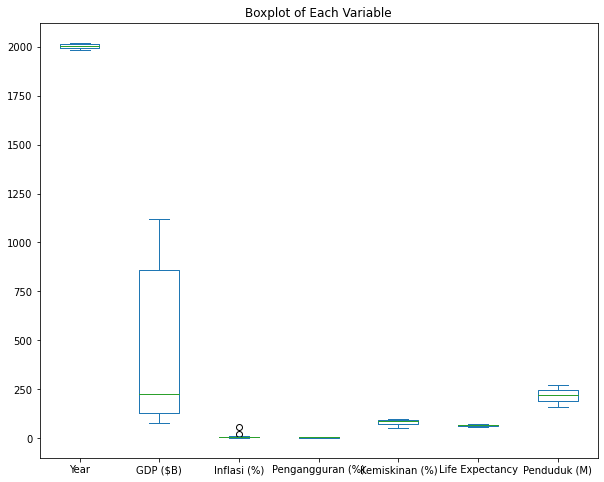

In [6]:
df.plot(figsize=(10,8), kind='box')
plt.title('Boxplot of Each Variable')
plt.show()

Berdasarkan boxplot di atas terdapat outlier, sehingga akan diremove terlebih dahulu.

# Remove Outliers

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print('Q1: \n',Q1)
print('Q3: \n',Q3)

Q1: 
 Year                1993.000000
GDP ($B)             128.026967
Inflasi (%)            5.134200
Pengangguran (%)       2.890000
Kemiskinan (%)        72.200000
Life Expectancy       63.310000
Penduduk (M)         191.737287
Name: 0.25, dtype: float64
Q3: 
 Year                2011.000000
GDP ($B)             860.854235
Inflasi (%)            9.420300
Pengangguran (%)       6.080000
Kemiskinan (%)        96.100000
Life Expectancy       69.338000
Penduduk (M)         247.099697
Name: 0.75, dtype: float64


In [8]:
IQR = Q3 - Q1
print(IQR)

Year                 18.000000
GDP ($B)            732.827268
Inflasi (%)           4.286100
Pengangguran (%)      3.190000
Kemiskinan (%)       23.900000
Life Expectancy       6.028000
Penduduk (M)         55.362410
dtype: float64


In [9]:
df = df[~((df < (Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

(35, 7)

Setelah dilakukan remove outliers, dapat dilihat bahwa jumlah data yang semula (37, 7) menjadi (35, 7) yang artinya terdapat 2 data yang bersifat outliers

# Descriptive Statistics

In [10]:
df.describe()

,Year,GDP ($B),Inflasi (%),Pengangguran (%),Kemiskinan (%),Life Expectancy,Penduduk (M)
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2002.200000,439.388656,7.006963,4.640229,83.248571,66.224743,219.734336
std,11.103259,368.787319,2.790595,1.772883,15.509113,3.772239,34.052026
min,1984.000000,75.929618,1.921000,1.620000,50.900000,59.624000,162.331962
25%,1992.500000,143.016833,4.929350,2.875000,71.800000,63.107000,190.147852
50%,2003.000000,234.772464,6.412500,4.400000,87.900000,66.400000,223.080121
75%,2011.500000,875.834495,9.348900,6.080000,95.950000,69.506000,248.661196
max,2020.000000,1119.099868,13.108700,8.060000,98.100000,71.774000,271.857970


Tabel di atas dapat diinterpretasikan sebagai berikut:

- Rata-rata GDP Indonesia dari tahun 1984-2020 adalah sebesar USD 439.39 B dengan standar deviasi sebesar 368.79. Sebaran data dari GDP Indonesia berada di range mean ± 1 * std, yaitu berada pada rentang 70.6 ⩽ Y1 ⩽ 808.18 (In $B).

- Rata-rata persentase kemiskinan di Indonesia dari tahun 1984-2020 adalah sebesar 83.25% dengan standar deviasi sebesar 15.51. Sebaran data dari persentase kemiskinan pada negara Indonesia berada di range mean ± 1 * std, yaitu berada pada rentang 67.74 ⩽ Y2 ⩽ 98.76 (In %).

- Rata-rata persentase inflasi di Indonesia dari tahun 1984-2020 adalah sebesar 7.01% dengan standar deviasi sebesar 2.79. Sebaran data dari persentase inflasi di Indonesia berada di range mean ± 1 * std, yaitu berada pada rentang 4.22 ⩽ X1 ⩽ 9.8 (In %)

- Rata-rata jumlah penduduk Indonesia dari tahun 1984-2020 adalah sebesar 219.73 M dengan standar deviasi sebesar 34.05. Sebaran data dari jumlah penduduk Indonesia berada di range mean ± 1 * std, yaitu berada pada rentang 185.68 ⩽ X2 ⩽ 253.78 (In Million).
- Rata-rata persentase pengangguran di Indonesia dari tahun 1984-2020 adalah sebesar 4.64% dengan standar deviasi sebesar 1.77. Sebaran data dari persentase pengangguran di Indonesia berada di range mean ± 1 * std, yaitu berada pada rentang 2.87 ⩽ X3 ⩽ 6.41 (In %).
- Rata-rata angka harapan hidup di Indonesia dari tahun 1984-2020 adalah sebesar 66.22 tahun dengan standar deviasi sebesar 3.77. Sebaran data dari angka harapan hidup di Indonesia berada di range mean ± 1 * std, yaitu berada pada rentang 62.45 ⩽ X4 ⩽ 69.99

### Distribution of Each Variable

Skewness of GDP: 0.6654267743799872
Skewness of Poverty: -0.8919620428568146
Skewness of Inflation: 0.2710694073010708
Skewness of Population: -0.11664917913164083
Skewness of Unemployment: 0.3509615039298449
Skewness of Life Expectancy: -0.17111484689910134


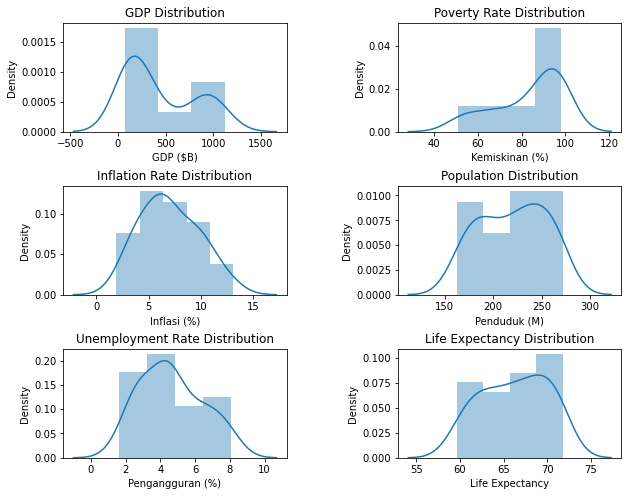

In [11]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(3,2,1)
sns.distplot(df['GDP ($B)'])
print('Skewness of GDP:',df['GDP ($B)'].skew())
ax.set_title('GDP Distribution')

ax = fig.add_subplot(3,2,2)
sns.distplot(df['Kemiskinan (%)'])
print('Skewness of Poverty:',df['Kemiskinan (%)'].skew())
ax.set_title('Poverty Rate Distribution')

ax = fig.add_subplot(3,2,3)
sns.distplot(df['Inflasi (%)'])
print('Skewness of Inflation:',df['Inflasi (%)'].skew())
ax.set_title('Inflation Rate Distribution')

ax = fig.add_subplot(3,2,4)
sns.distplot(df['Penduduk (M)'])
print('Skewness of Population:',df['Penduduk (M)'].skew())
ax.set_title('Population Distribution')

ax = fig.add_subplot(3,2,5)
sns.distplot(df['Pengangguran (%)'])
print('Skewness of Unemployment:',df['Pengangguran (%)'].skew())
ax.set_title('Unemployment Rate Distribution')

ax = fig.add_subplot(3,2,6)
sns.distplot(df['Life Expectancy'])
print('Skewness of Life Expectancy:',df['Life Expectancy'].skew())
ax.set_title('Life Expectancy Distribution')

plt.show()

Berdasarkan hasil perhitungan skewness dan visualisasi di atas dapat diambil beberapa kesimpulan sebagai berikut.
- Distribusi persentase inflasi termasuk symmetric karena skewness berada pada rentang -0.5 dan 0.5.
- Distribusi dari jumlah penduduk termasuk symmetric karena skewness berada pada rentang -0.5 dan 0.5.
- Distribusi dari persentase pengangguran termasuk symmetric karena skewness berada pada rentang -0.5 dan 0.5.
- Distribusi dari life expectancy termasuk symmetric karena skewness berada pada rentang -0.5 dan 0.5.
- Distribusi dari GDP tergolong moderately skewed karena skewness berada pada rentang 0.5 dan 1
- Distribusi dari persentase kemiskinan tergolong moderately skewed karena skewness berada pada rentang -1 dan -0.5

### Indonesia's GDP from 1984-2020

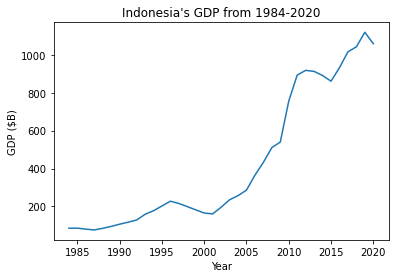

In [12]:
sns.lineplot(data=df, x="Year", y="GDP ($B)")
plt.title("Indonesia's GDP from 1984-2020")
plt.show()

Berdasarkan visualisasi di atas dapat dilihat bahwa dari tahun 1984-2020 GDP Indonesia cenderung mengalami peningkatan meskipun terjadi beberapa penurunan pada periode tertentu, seperti pada tahun 2020 yang mengalami penurunan akibat pandemi Covid-19

### Indonesia's Poverty Rate from 1984-2020

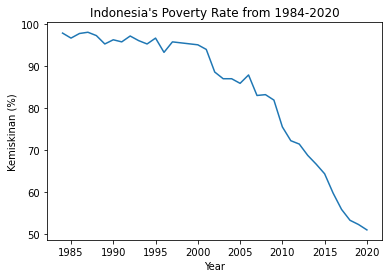

In [13]:
sns.lineplot(data=df, x="Year", y="Kemiskinan (%)")
plt.title("Indonesia's Poverty Rate from 1984-2020")
plt.show()

Berdasarkan visualisasi di atas dapat dilihat bahwa dari tahun 1984-2020 Persentase Kemiskinan di Indonesia cenderung mengalami penurunan.

# Correlation Between Variables

In [14]:
df.corr()

,Year,GDP ($B),Inflasi (%),Pengangguran (%),Kemiskinan (%),Life Expectancy,Penduduk (M)
Year,1.000000,0.922094,-0.479452,0.461842,-0.920747,0.998569,0.999696
GDP ($B),0.922094,1.000000,-0.613025,0.125131,-0.974286,0.912863,0.915455
Inflasi (%),-0.479452,-0.613025,1.000000,0.165501,0.623107,-0.464224,-0.469813
Pengangguran (%),0.461842,0.125131,0.165501,1.000000,-0.127273,0.480346,0.476483
Kemiskinan (%),-0.920747,-0.974286,0.623107,-0.127273,1.000000,-0.904389,-0.912028
Life Expectancy,0.998569,0.912863,-0.464224,0.480346,-0.904389,1.000000,0.999381
Penduduk (M),0.999696,0.915455,-0.469813,0.476483,-0.912028,0.999381,1.000000


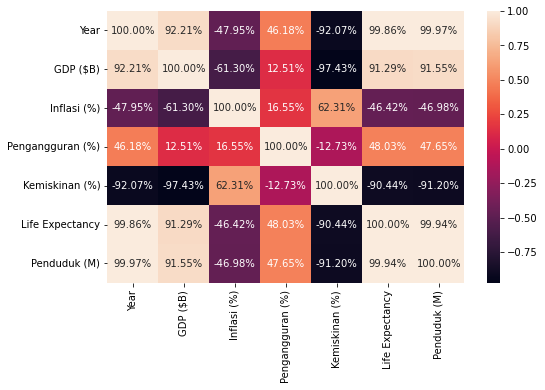

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.show()

Dari Heat Map di atas, dapat terlihat bahwa terdapat hubungan yang beragam antarvariabel. Artinya, ada variabel yang berhubungan secara positif maupun negatif. Hal ini mengindikasikan bahwa hubungan antara dependent variabel dan independent variabel ada yang berbanding lurus dan juga ada yang berbanding terbalik. Hubungan antarvariabel dependent dan independent yang paling kuat adalah GDP($B) dan Kemiskinan (%) dimana angka korelasinya sebesar -97.43% (mendekati -100%).

# Pair Plot Between Variables

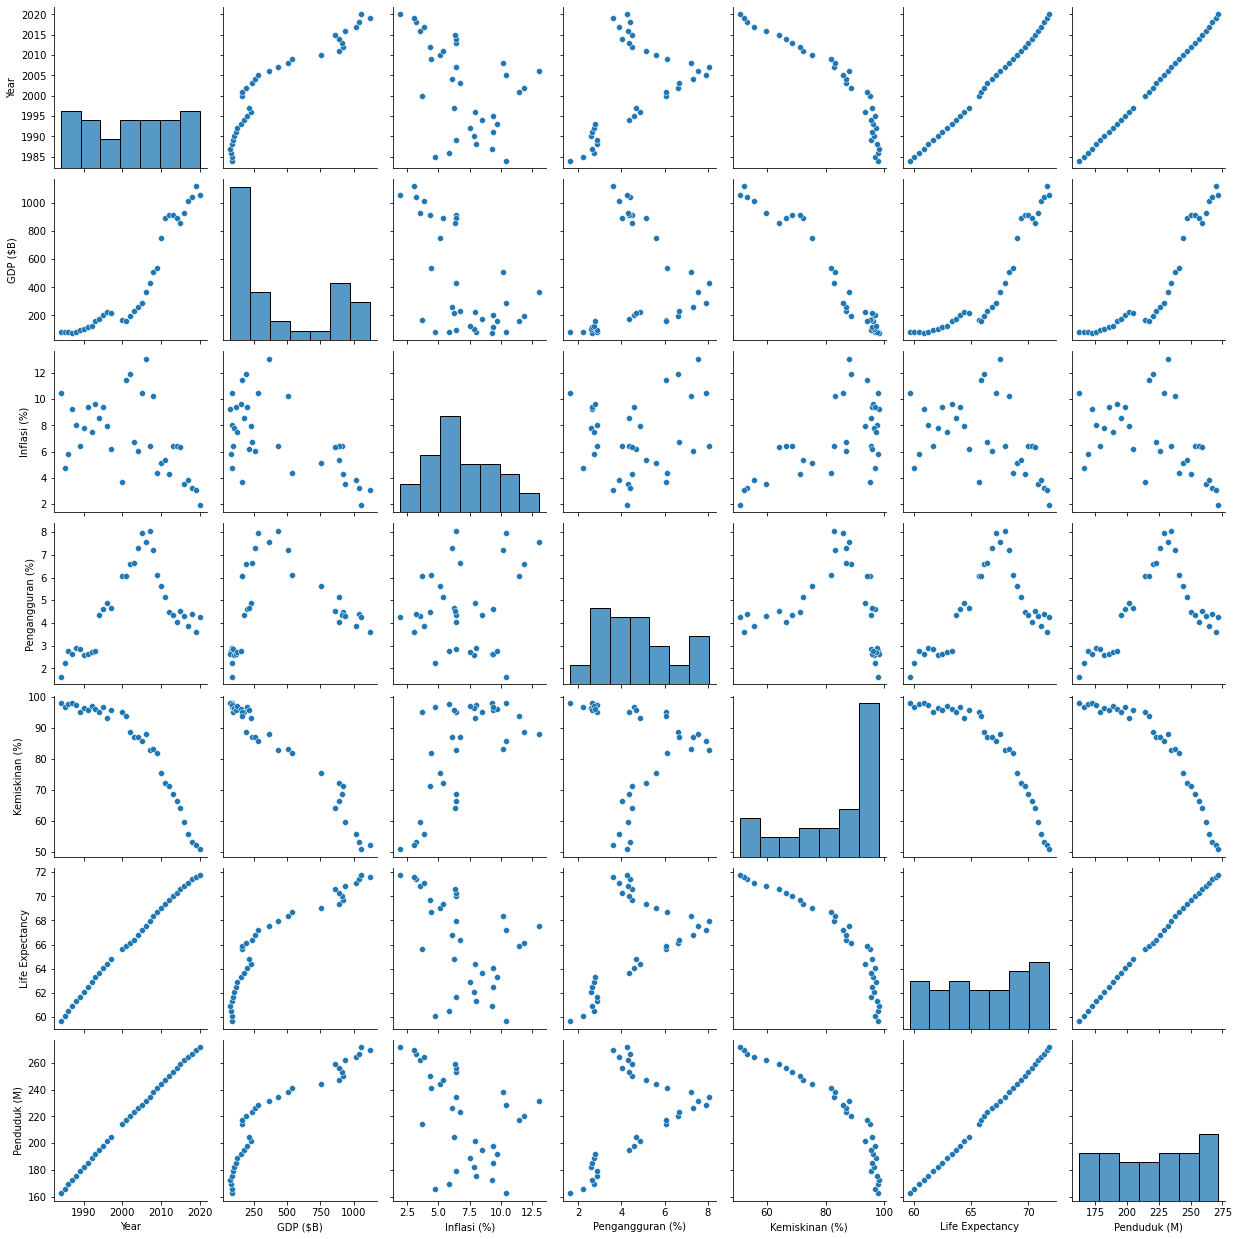

In [16]:
sns.pairplot(data=df)
plt.show()

# Modelling

## Proportion Dataset for Training and Testing

In [17]:
sz = int(len(df)*0.8)
df_train, df_testing = df.iloc[:sz], df.iloc[sz:]

print('Jumlah Training Data:', len(df_train))
print('Jumlah Testing Data:', len(df_testing))

Jumlah Training Data: 28
Jumlah Testing Data: 7


## Persamaan Struktural

$GDP = β_0 + β_1 Pengangguran + β_2 Kemiskinan + β_3 Inflasi + β_4 Penduduk +u_i$

$Kemiskinan = ξ_0 + ξ_1 GDP + ξ_2 Life Expectancy + ξ_3 Inflasi + ξ_4 Pengangguran + v_i$

Source:
- Bekti, et. al. 2014. *Model Persamaan Simultan pada Analisis Hubungan Kemiskinan dan PDRB.* *Journal ComTech 5(2).*
- Dukalang, Hendra. 2021. *Modeling of Economic Growth and Poverty with Simultaneous Equation Approach.* 7(1).
- Gujarati, D. N. (2010). Basic Econometrics . New York: Mc Graw-hill Companies.


- Variabel endogen: GDP, Kemiskinan
- Variabel eksogen: Pengangguran, Inflasi, Penduduk, Life Expectancy

## Persamaan Reduced Form

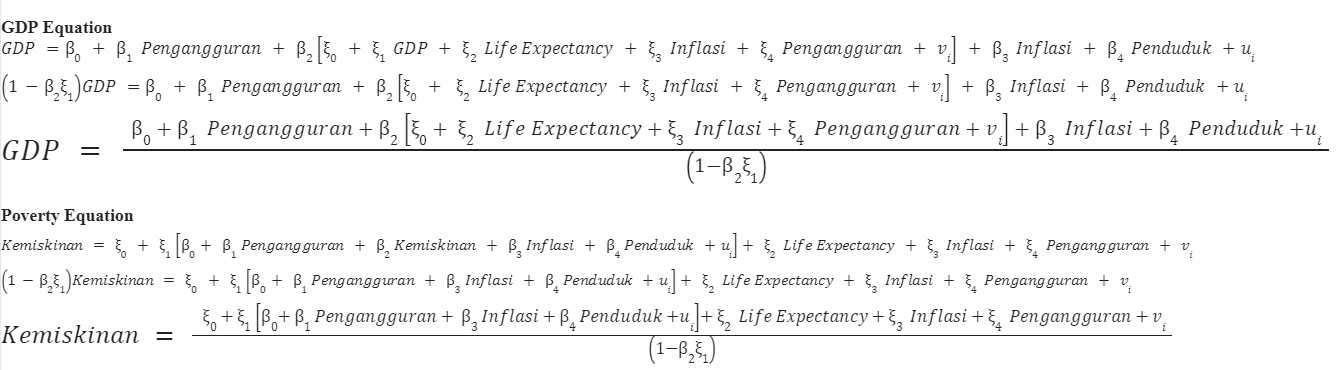

## Uji Hausman

In [18]:
df1 = sm.tools.tools.add_constant(df_train)

### Check the Endogenous of GDP to Poverty

#### First Stage Regression

In [19]:
reg_s1_GDP = sm.OLS(df1['GDP ($B)'], df1[['const','Pengangguran (%)','Kemiskinan (%)','Inflasi (%)','Penduduk (M)']]).fit()
print (reg_s1_GDP.summary())

                            OLS Regression Results                            
Dep. Variable:               GDP ($B)   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     172.7
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           8.47e-17
Time:                        08:01:15   Log-Likelihood:                -147.62
No. Observations:                  28   AIC:                             305.2
Df Residuals:                      23   BIC:                             311.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1235.5217    593.761  

In [20]:
df1['GDP pred'] = reg_s1_GDP.predict()
df1['GDP resid'] = reg_s1_GDP.resid
df1.head()

,const,Year,GDP ($B),Inflasi (%),Pengangguran (%),Kemiskinan (%),Life Expectancy,Penduduk (M),GDP pred,GDP resid
0,1.0,1984,84.853700,10.4550,1.62,97.9,59.624,162.331962,58.119071,26.734629
1,1.0,1985,85.289492,4.7245,2.22,96.7,60.038,165.791694,79.330538,5.958954
2,1.0,1986,79.954073,5.8227,2.75,97.8,60.452,169.135273,45.715745,34.238328
3,1.0,1987,75.929618,9.2787,2.64,98.1,60.866,172.421390,56.120011,19.809607
4,1.0,1988,84.300174,8.0454,2.89,97.3,61.280,175.694647,78.186640,6.113535


#### Second Stage Regression

In [21]:
reg_s2_Kemiskinan = sm.OLS(df1['Kemiskinan (%)'], df1[['const','GDP pred','GDP resid','Life Expectancy','Inflasi (%)','Pengangguran (%)']]).fit()
print (reg_s2_Kemiskinan.summary())

                            OLS Regression Results                            
Dep. Variable:         Kemiskinan (%)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.368e+04
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.23e-37
Time:                        08:01:15   Log-Likelihood:                 12.001
No. Observations:                  28   AIC:                            -12.00
Df Residuals:                      22   BIC:                            -4.009
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.5259      3.657  

$H_{0}$ : tidak terdapat endogenitas

$H_{1}$ :  terdapat endogenitas

P-value dari residual (0.010) < 0.05, sehingga dapat dikatakan terdapat endogenitas terhadap Poverty

### Check the Endogenous of Poverty to GDP

#### First Stage Regression

In [22]:
reg_s1_Kemiskinan = sm.OLS(df1['Kemiskinan (%)'], df1[['const','GDP ($B)','Life Expectancy','Inflasi (%)','Pengangguran (%)']]).fit()
print (reg_s1_Kemiskinan.summary())

                            OLS Regression Results                            
Dep. Variable:         Kemiskinan (%)   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     131.6
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.70e-15
Time:                        08:01:15   Log-Likelihood:                -56.159
No. Observations:                  28   AIC:                             122.3
Df Residuals:                      23   BIC:                             129.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               90.6341     34.875  

In [23]:
df1['Kemiskinan pred'] = reg_s1_Kemiskinan.predict()
df1['Kemiskinan resid'] = reg_s1_Kemiskinan.resid
df1.head()

,const,Year,GDP ($B),Inflasi (%),Pengangguran (%),Kemiskinan (%),Life Expectancy,Penduduk (M),GDP pred,GDP resid,Kemiskinan pred,Kemiskinan resid
0,1.0,1984,84.853700,10.4550,1.62,97.9,59.624,162.331962,58.119071,26.734629,98.414842,-0.514842
1,1.0,1985,85.289492,4.7245,2.22,96.7,60.038,165.791694,79.330538,5.958954,97.754475,-1.054475
2,1.0,1986,79.954073,5.8227,2.75,97.8,60.452,169.135273,45.715745,34.238328,97.576771,0.223229
3,1.0,1987,75.929618,9.2787,2.64,98.1,60.866,172.421390,56.120011,19.809607,98.001935,0.098065
4,1.0,1988,84.300174,8.0454,2.89,97.3,61.280,175.694647,78.186640,6.113535,97.552780,-0.252780


#### Second Stage Regression

In [24]:
reg_s2_GDP = sm.OLS(df1['GDP ($B)'], df1[['const','Pengangguran (%)','Kemiskinan pred','Kemiskinan resid','Inflasi (%)','Penduduk (M)']]).fit()
print(reg_s2_GDP.summary())

                            OLS Regression Results                            
Dep. Variable:               GDP ($B)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.254e+06
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           3.19e-59
Time:                        08:01:15   Log-Likelihood:                -19.867
No. Observations:                  28   AIC:                             51.73
Df Residuals:                      22   BIC:                             59.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3078.4952      7.546  

$H_{0}$ : tidak terdapat endogenitas

$H_{1}$ :  terdapat endogenitas

P-value dari residual (0.000) < 0.05, sehingga dapat dikatakan terdapat endogenitas terhadap GDP

## Identification by Rank and Order

- M = jumlah variabel endogen dalam model
- m = jumlah variabel endogen dalam suatu persamaan
- K = jumlah variabel exogen dalam model
- k = jumlah variabel exogen dalam suatu persamaan


Source:

Gujarati, D. N. (2010). Basic Econometrics . New York: Mc Graw-hill Companies.

### Order Condition Check

- Apabila K-k = m-1 persamaan tergolong exactly identified
- Apabila K-k > m-1 persamaan tergolong exactly over identified

In [25]:
eq = ['GDP','Poverty']
K = ['4','4'] # 4 variabel eksogen 
k = ['3','3']
Kk = ['1','1']

m = ['2','2']
m1 = ['1','1']

i = ['Exactly Identified', 'Exactly Identified']

col = {'Equation': eq, 
           'K': K, 
           'k': k,
           'K-k':Kk, 
           'm': m, 
           'm-1': m1, 
           'Identification': i}
oc = pd.DataFrame(col).set_index('Equation')
oc

,K,k,K-k,m,m-1,Identification
Equation,,,,,,
GDP,4,3,1,2,1,Exactly Identified
Poverty,4,3,1,2,1,Exactly Identified


Persamaan GDP dan Poverty termasuk exactly identified. Oleh karena itu, order condition terpenuhi.

### Rank Condition Check

$GDP - β_0 - β_1 Pengangguran - β_2 Kemiskinan - β_3 Inflasi - β_4 Penduduk = u_i$

$Kemiskinan - ξ_0 - ξ_1 GDP - ξ_2 Life Expectancy - ξ_3 Inflasi - ξ_4 Pengangguran = v_i$

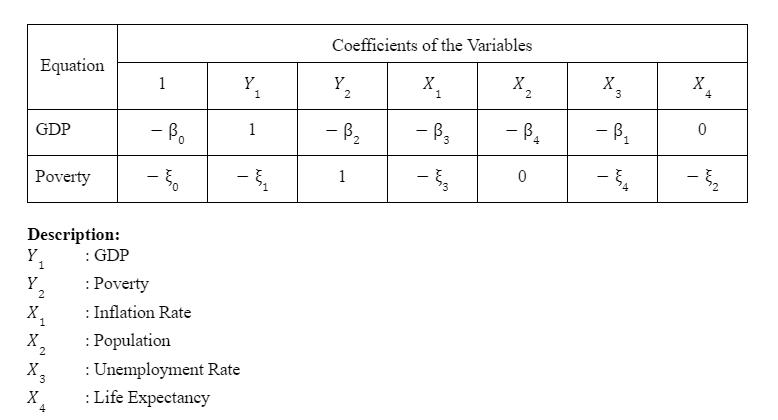

**NB: Life Expectancy tidak termasuk dalam persamaan GDP**

1. Dari tabel di atas, coret seluruh koefisien pada baris pertama dan kolom-kolom dengan koefisien non zero pada baris pertama.
2. Misalkan A merupakan matriks yang berisi koefisien Life Expectancy setelah proses pencoretan. Oleh karena itu didapatkan nilai dari A sebagai berikut. <br>
\begin{bmatrix}-ξ_2 \\\end{bmatrix} 
<br>
$det|A| = -ξ_2 \neq 0$ <br>
Karena nilai dari determinan matriks A $\neq 0$, persamaan ini teridentifikasi dengan rank 1

**NB: Jumlah Penduduk tidak termasuk dalam persamaan Poverty**
1. Dari tabel di atas, coret seluruf koefisien pada baris kedua dan kolom-kolom dengan koefisien non-zero pada baris kedua.
2. Misalkan Z merupakan matriks yang berisi koefisien Jumlah Penduduk setelah proses pencoretan. Oleh karena itu didapatkan nilai dari Z sebagai berikut.
<br>
\begin{bmatrix}-\beta_4 \\\end{bmatrix} 
<br>
$det|Z| = -\beta_4 \neq 0$ <br>
Karena nilai dari determinan matriks Z $\neq 0$, persamaan ini teridentifikasi dengan rank 1

Persamaan GDP dan Poverty teridentifikasi, sehingga rank condition terpenuhi.

Setelah proses identifikasi order dan rank terpenuhi, selanjutnya kita akan menggunakan metode **2SLS** untuk estimasi parameter

## Two-Stage Least Squares Method

Sebelum melakukan pemodelan kita akan rename column GDP, Inflasi, Pengangguran, Kemiskinan, dan Penduduk terlebih dahulu

In [26]:
df_train.rename(columns = {'GDP ($B)':'GDP','Inflasi (%)':'INF','Pengangguran (%)':'UR','Kemiskinan (%)':'PR','Penduduk (M)':'POP','Life Expectancy':'LE'}, inplace = True)

**Description :**
1. GDP: gross domestic product ($B)
2. INF: Inflasi (%)
3. UR: Pengangguran (%)
4. LE: life expectancy (year)
5. POP: penduduk (M)
6. PR: Kemiskinan (%)

### GDP Model

In [27]:
formula1 = "GDP ~ INF + UR + [PR ~ LE + GDP] + POP + 1" #reduced form
mod1 = IV2SLS.from_formula(formula1, df_train).fit()
print(mod1.first_stage) #first stage summary

    First Stage Estimation Results    
                                    PR
--------------------------------------
R-squared                       0.9818
Partial R-squared               0.8066
Shea's R-squared                0.8066
Partial F-statistic             139.52
P-value (Partial F-stat)        0.0000
Partial F-stat Distn           chi2(2)
========================== ===========
Intercept                      -344.11
                             (-5.0589)
INF                             0.0294
                              (0.2243)
POP                            -1.3450
                             (-6.1910)
UR                              0.2352
                              (0.5845)
GDP                            -0.0239
                             (-7.1196)
LE                              11.079
                              (6.4744)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [28]:
print(mod1.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:                    GDP   R-squared:                      0.9654
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9594
No. Observations:                  28   F-statistic:                    1186.5
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:15   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      1987.3     407.67     4.8746     0.0000      1188.2      2786.3
INF           -0.8649     4.1711    -0.2074     0.83

Dari stage pertama 2SLS didapatkan persamaan untuk Poverty sebagai berikut.<br>
$Kemiskinan = -344.11 +  0.0294 Inflasi + 0.2352 Pengangguran + 11.079 Life Expectancy + [-0.0239(Inflasi + Pengangguran) - 1.3450 Penduduk] $ <br>
Kemudian dari second stage kita mendapatkan GDP model sebagai berikut. <br>


$GDP = 1987.3 - 0.8649 Inflasi  + 3.3385 Penduduk - 41.408 Pengangguran - 24.282 Kemiskinan$ 

Berdasarkan tabel summary di atas nilai R-square sebesar **96.54%**. Hal ini berarti bahwa 96.54% variabel dependen dapat direpresentasikan oleh independent variabel

### Poverty Model

In [29]:
formula2 = "PR ~ INF + UR + [GDP ~ POP + PR] + LE + 1" #reduced form
mod2 = IV2SLS.from_formula(formula2, df_train).fit()
print(mod2.first_stage) #first stage summary

    First Stage Estimation Results    
                                   GDP
--------------------------------------
R-squared                       0.9765
Partial R-squared               0.7147
Shea's R-squared                0.7147
Partial F-statistic             119.70
P-value (Partial F-stat)        0.0000
Partial F-stat Distn           chi2(2)
========================== ===========
Intercept                      -8279.5
                             (-3.0722)
INF                            -1.1036
                             (-0.2942)
LE                              260.52
                              (3.7561)
UR                             -26.989
                             (-3.1962)
POP                            -27.559
                             (-3.2824)
PR                             -27.528
                             (-10.428)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [30]:
print(mod2.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:                     PR   R-squared:                      0.9462
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9369
No. Observations:                  28   F-statistic:                    653.48
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:15   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      7.4233     27.348     0.2714     0.7861     -46.178      61.025
INF           -0.0522     0.1747    -0.2989     0.76

Dari stage pertama 2SLS didapatkan persamaan untuk Poverty sebagai berikut.<br>
$GDP = -8279.5 - 26.989 Pengangguran - 1.1036 Inflasi - 27.559 Penduduk + [260.52 Life Expectancy - 27.528(Inflasi + Pengangguran)]$ <br>
Kemudian dari second stage kita mendapatkan GDP model sebagai berikut. <br>


$Kemiskinan = 7.4233  - 0.0522 Inflasi  + 1.6268 Life Expectancy - 2.0212 Pengangguran - 0.0446 GDP$ 

Berdasarkan summary di atas, R-squared bernilai sebesar 94.62%. Berarti, 94,62% variabel dependen dapat direpresentasikan oleh independent variabel

# Diagnostic Testing

In [31]:
df_train["GDP_pred"] = mod1.fitted_values 
df_train["GDP_resid"] = mod1.resids
df_train["PR_pred"] = mod2.fitted_values
df_train["PR_resid"] = mod2.resids
df_train.head()

,Year,GDP,INF,UR,PR,LE,POP,GDP_pred,GDP_resid,PR_pred,PR_resid
0,1984,84.853700,10.4550,1.62,97.9,59.624,162.331962,75.866603,8.987097,96.815027,1.084973
1,1985,85.289492,4.7245,2.22,96.7,60.038,165.791694,96.666907,-11.377416,96.555628,0.144372
2,1986,79.954073,5.8227,2.75,97.8,60.452,169.135273,58.222941,21.731131,96.338335,1.461665
3,1987,75.929618,9.2787,2.64,98.1,60.866,172.421390,63.474785,12.454833,97.233052,0.866948
4,1988,84.300174,8.0454,2.89,97.3,61.280,175.694647,84.542880,-0.242705,97.092518,0.207482


In [32]:
print("GDP Model :  \n Sum of Residuals = ", df_train["GDP_resid"].sum())
print("Poverty Model :  \n Sum of Residuals = ", df_train["PR_resid"].sum())

GDP Model :  
 Sum of Residuals =  3.750955102077569e-10
Poverty Model :  
 Sum of Residuals =  8.69661676006217e-09


Berdasarkan hasil sum of residuals di atas dapat dilihat baik GDP Model maupun Poverty Model memiliki sum of residuals mendekati 0

# Uji Asumsi Klasik

### Normality Test

#### GDP 

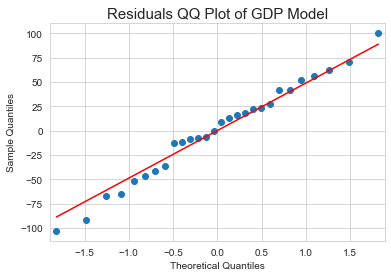

In [33]:
sns.set_style('whitegrid')
sm.qqplot(df_train["GDP_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of GDP Model', size=15)
py.show()

In [34]:
jb_GDP = stats.jarque_bera(df_train["GDP_resid"])
print("Jarque-Bera Statistics: ", jb_GDP[0])
print("Jarque-Bera P-Value: ", jb_GDP[1])

Jarque-Bera Statistics:  0.47820599005843617
Jarque-Bera P-Value:  0.7873337867301669


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,787, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

#### Poverty

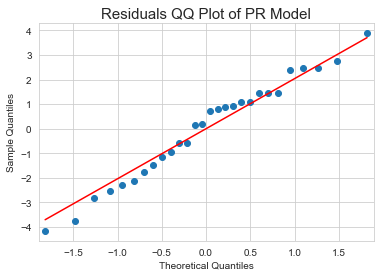

In [35]:
sns.set_style('whitegrid')
sm.qqplot(df_train["PR_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of PR Model', size=15)
py.show()

In [36]:
jb_PR = stats.jarque_bera(df_train["PR_resid"])
print("Jarque-Bera Statistics: ", jb_PR[0])
print("Jarque-Bera P-Value: ", jb_PR[1])

Jarque-Bera Statistics:  0.9613403214116658
Jarque-Bera P-Value:  0.6183688464130618


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,618, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

### Heteroskedasticity Test

#### GDP 

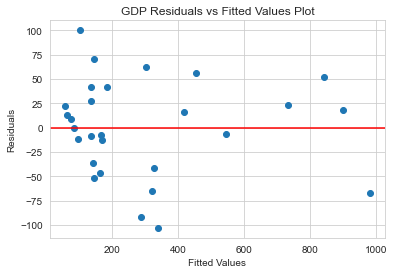

In [37]:
plt.scatter(df_train['GDP_pred'], df_train['GDP_resid']) #resid vs fitted plot
plt.axhline(y = df_train['GDP_resid'].mean(), color ='red')
plt.title('GDP Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [38]:
m1 = "GDP ~ 1 + UR + PR + Q('INF') + POP"
y, X = dmatrices(m1, df_train, return_type='dataframe')

bp_GDP = het_breuschpagan(df_train['GDP_resid'], X)

print("Breusch-Pagan Statistics:", bp_GDP[0])
print("Breusch-Pagan P-value", bp_GDP[1])

Breusch-Pagan Statistics: 4.081063598113593
Breusch-Pagan P-value 0.39514623593504283


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

#### Poverty

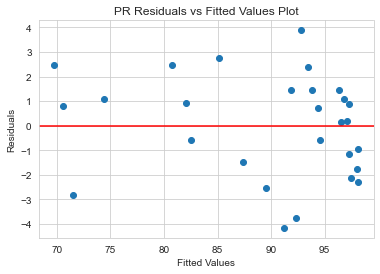

In [39]:
plt.scatter(df_train['PR_pred'], df_train['PR_resid']) #resid vs fitted plot
plt.axhline(y = df_train['PR_resid'].mean(), color ='red')
plt.title('PR Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [40]:
m2 = "PR ~ 1 + GDP + LE + Q('INF') + UR"
y, X = dmatrices(m2, df_train, return_type='dataframe')

bp_PR = het_breuschpagan(df_train['PR_resid'], X)

print("Breusch-Pagan Statistics:", bp_PR[0])
print("Breusch-Pagan P-value", bp_PR[1])

Breusch-Pagan Statistics: 4.588840240664252
Breusch-Pagan P-value 0.3321429084227548


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

### Multicollinearity Test

In [41]:
def calc_vif(x): #vif function
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

#### GDP 

In [42]:
vif_GDP = df_train[['UR','INF','POP']]
calc_vif(vif_GDP)

,Variables,VIF
0,UR,12.004173
1,INF,8.354164
2,POP,19.824301


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari UR, INF, dan POP lebih besar dari 5. Oleh karena itu, terdapat multikolinearitas di antara variabel tersebut.

#### Poverty

In [43]:
vif_PR = df_train[['LE','INF','UR']]
calc_vif(vif_PR)

,Variables,VIF
0,LE,17.228611
1,INF,10.179690
2,UR,8.563906


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari LE, INF, dan UR lebih besar dari 5. Oleh karena itu, terdapat multikolinearitas diantara variabel tersebut.

### Autocorrelation Test

#### GDP 

In [44]:
durbin_watson(df_train['GDP_resid'])

0.8631797990708028

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di GDP model karena hasilnya tidak berada diantara 1.5 - 2.5

#### Poverty

In [45]:
durbin_watson(df_train['PR_resid'])

0.8855294141149179

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di Poverty model karena hasilnya tidak berada diantara 1.5 - 2.5

Dari uji asumsi klasik dapat diambil beberapa kesimpulan.
1. Normality test untuk GDP dan Poverty Model terpenuhi 
2. Terdapat autokorelasi untuk GDP dan Poverty Model karena hasil dari test durbin watson tidak memenuhi rule of thumb
3. Terdapat multikolinearitas  pada GDP dan Poverty Model karena nilai dari VIF > 5
4. Tidak terdapat heteroskedastisitas karena variance konstan

# Transformasi Data

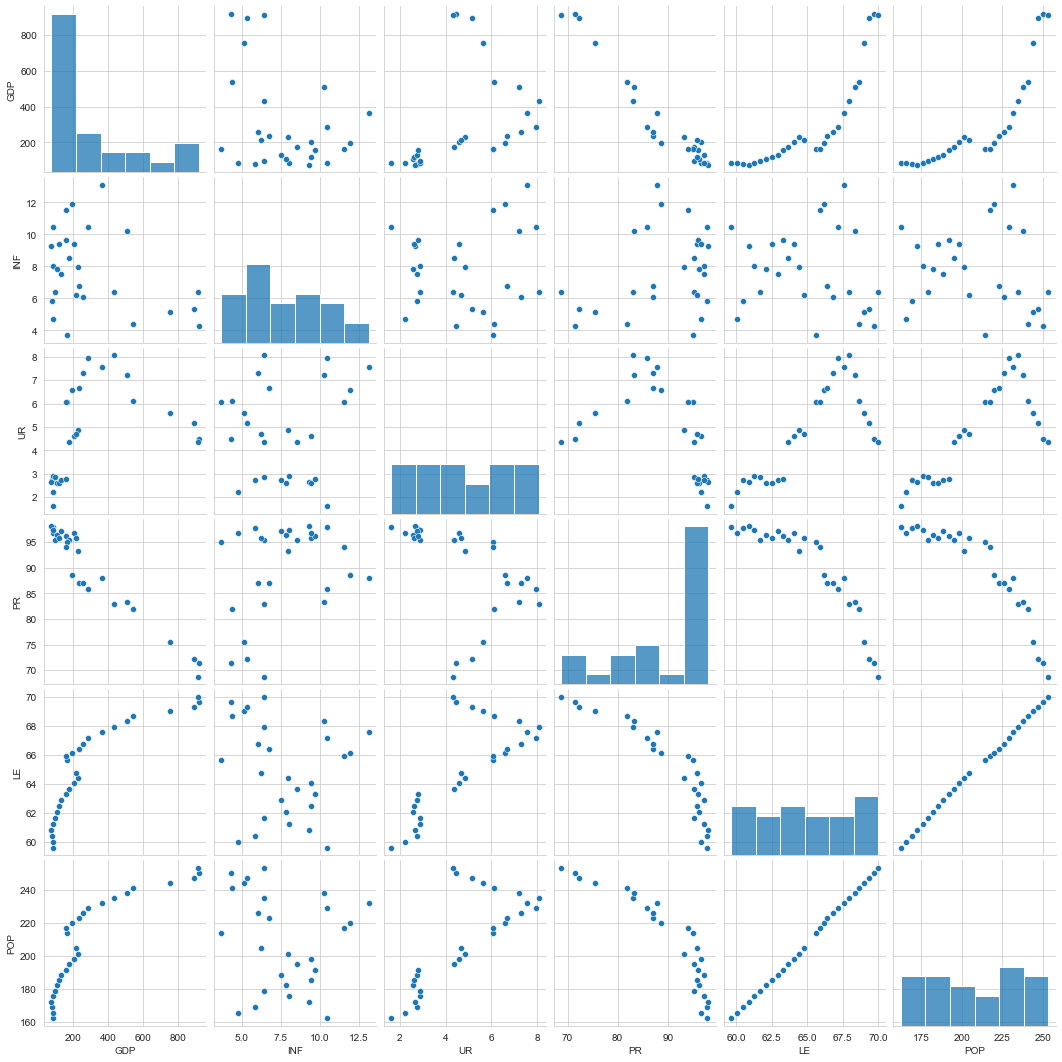

In [46]:
sns.pairplot(data=df_train[["GDP","INF","UR","PR","LE",'POP']])
plt.show()

In [47]:
print('UR Skewness:',df_train['UR'].skew())
print('LE Skewness:',df_train['LE'].skew())
print('POP Skewness:',df_train['POP'].skew())

UR Skewness: 0.13710592884734724
LE Skewness: -0.08823756148971734
POP Skewness: -0.04162741303389695


Berdasarkan pairplot di atas GDP dan INF termasuk right skewed, sehingga dapat ditransformasi dengan menggunakan logharitmic atau square root atau cubic root. Kemudian, untuk PR tergolong left skewed sehingga dapat ditransformasi menggunakan logaritma atau kuadrat.

In [48]:
df_trainGDP = df_train.copy()
df_trainPR = df_train.copy()

df_trainGDP['square_PR'] = df_train['PR']**2
df_trainGDP['ln_INF'] = np.log(df_train['INF'])
df_trainGDP['sqrt_GDP'] = df_train['GDP']**(1/2)

df_trainPR['sqrt_GDP'] = df_train['GDP']**(1/2)
df_trainPR['cbrt_INF'] = df_train['INF']**(1/3) 
df_trainPR['ln_PR'] = np.log(df_train['PR'])

## Transformasi GDP Model

In [49]:
trans_formula1 = "sqrt_GDP ~ ln_INF + UR + [square_PR ~ LE + sqrt_GDP] + POP + 1" #reduced form
trans_mod1 = IV2SLS.from_formula(trans_formula1, df_trainGDP).fit()
print(trans_mod1.first_stage) #first stage summary

     First Stage Estimation Results    
                              square_PR
---------------------------------------
R-squared                        0.9802
Partial R-squared                0.7914
Shea's R-squared                 0.7914
Partial F-statistic              99.288
P-value (Partial F-stat)         0.0000
Partial F-stat Distn            chi2(2)
========================== ============
Intercept                    -8.532e+04
                              (-6.5785)
POP                             -283.85
                              (-7.5400)
UR                               94.237
                               (1.5653)
ln_INF                          -9.2994
                              (-0.0576)
LE                               2383.1
                               (7.5098)
sqrt_GDP                        -169.07
                              (-6.4829)
---------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original mo

In [50]:
print(trans_mod1.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:               sqrt_GDP   R-squared:                      0.9610
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9542
No. Observations:                  28   F-statistic:                    1511.1
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:20   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      15.614     8.6106     1.8133     0.0698     -1.2625      32.490
POP            0.1319     0.0292     4.5099     0.00

Persamaan GDP Model setelah ditransformasi menjadi sebagai berikut.<br>

$\sqrt{GDP} = 15.614  + 0.1319 Penduduk - 0.8994 Pengangguran - 0.1275 ln(Inflasi) - 0.0028 Kemiskinan^{2}$ <br>

Berdasarkan tabel summary di atas dapat dilihat bahwa R-squared bernilai 96.10%. Artinya, 96.10% variabel dependen dapat direpresentasikan oleh variabel independen

## Transformasi Poverty Model

In [51]:
trans_formula2 = "ln_PR ~ cbrt_INF + UR + [sqrt_GDP ~ POP + ln_PR] + LE + 1"
trans_mod2 = IV2SLS.from_formula(trans_formula2, df_trainPR).fit()
print(trans_mod2.first_stage) #first stage summary

    First Stage Estimation Results    
                              sqrt_GDP
--------------------------------------
R-squared                       0.9791
Partial R-squared               0.6680
Shea's R-squared                0.6680
Partial F-statistic             122.21
P-value (Partial F-stat)        0.0000
Partial F-stat Distn           chi2(2)
========================== ===========
Intercept                      -121.27
                             (-1.9958)
LE                              9.0000
                              (5.6564)
UR                              0.0529
                              (0.2450)
cbrt_INF                       -0.3297
                             (-0.3096)
POP                            -0.9718
                             (-5.0846)
ln_PR                          -54.483
                             (-11.055)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [52]:
print(trans_mod2.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  ln_PR   R-squared:                      0.9246
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9115
No. Observations:                  28   F-statistic:                    521.58
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:20   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      3.6322     0.4342     8.3654     0.0000      2.7812      4.4832
LE             0.0194     0.0078     2.5029     0.01

Persamaan Poverty Model setelah ditransformasi menjadi sebagai berikut.<br>

$\ln{(PR)} = 3.6322  + 0.0194 Life Expectancy - 0.0110 Pengangguran + 0.0005 Inflasi^{1/3} - 0.0221 \sqrt{GDP}$ <br>

Berdasarkan tabel summary di atas dapat dilihat bahwa R-squared bernilai 92.46%. Artinya, 92.46% variabel dependen dapat direpresentasikan oleh variabel independen

## Diagnostic Test

In [53]:
df_trainGDP["trans_GDP_pred"] = trans_mod1.fitted_values
df_trainGDP["trans_GDP_resid"] = trans_mod1.resids
df_trainPR["trans_PR_pred"] = trans_mod2.fitted_values
df_trainPR["trans_PR_resid"] = trans_mod2.resids

In [54]:
print("GDP Model :  \n Sum of Residuals = ", df_trainGDP["trans_GDP_resid"].sum())
print("Poverty Model :  \n Sum of Residuals = ", df_trainPR["trans_PR_resid"].sum())

GDP Model :  
 Sum of Residuals =  -1.3856471525741654e-10
Poverty Model :  
 Sum of Residuals =  4.82343054386547e-11


Berdasarkan hasil sum of residuals di atas dapat dilihat baik GDP Model maupun Poverty Model yang telah ditransformasi memiliki sum of residuals mendekati 0

# Uji Asumsi Klasik

### Normality Test

#### GDP 

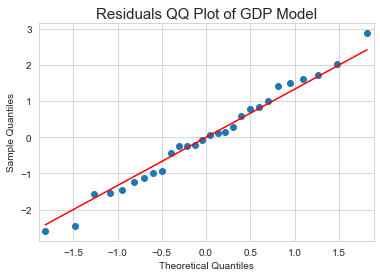

In [55]:
sns.set_style('whitegrid')
sm.qqplot(df_trainGDP["trans_GDP_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of GDP Model', size=15)
py.show()

In [56]:
jb_GDP = stats.jarque_bera(df_trainGDP["trans_GDP_resid"])
print("Jarque-Bera Statistics: ", jb_GDP[0])
print("Jarque-Bera P-Value: ", jb_GDP[1])

Jarque-Bera Statistics:  0.3712750108226375
Jarque-Bera P-Value:  0.8305746192237716


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,831, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

#### Poverty

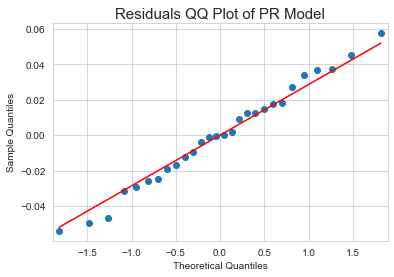

In [57]:
sns.set_style('whitegrid')
sm.qqplot(df_trainPR["trans_PR_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of PR Model', size=15)
py.show()

In [58]:
jb_PR = stats.jarque_bera(df_trainPR["trans_PR_resid"])
print("Jarque-Bera Statistics: ", jb_PR[0])
print("Jarque-Bera P-Value: ", jb_PR[1])

Jarque-Bera Statistics:  0.5565872721147226
Jarque-Bera P-Value:  0.7570744845060926


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,757, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

### Heteroskedasticity Test

#### GDP 

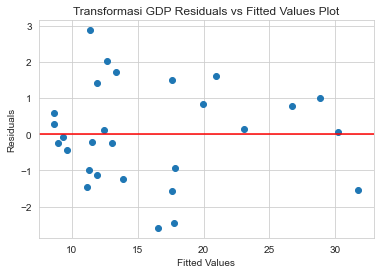

In [59]:
plt.scatter(df_trainGDP["trans_GDP_pred"], df_trainGDP["trans_GDP_resid"]) #resid vs fitted plot
plt.axhline(y = df_trainGDP["trans_GDP_resid"].mean(), color ='red')
plt.title('Transformasi GDP Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [60]:
m1_trans = "sqrt_GDP ~ 1 + UR + square_PR + ln_INF + POP"
y, X = dmatrices(m1_trans, df_trainGDP, return_type='dataframe')

bp_GDP1 = het_breuschpagan(df_trainGDP["trans_GDP_resid"], X)

print("Breusch-Pagan Statistics:", bp_GDP1[0])
print("Breusch-Pagan P-value", bp_GDP1[1])

Breusch-Pagan Statistics: 6.162632092919658
Breusch-Pagan P-value 0.18732755758130742


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

#### Poverty

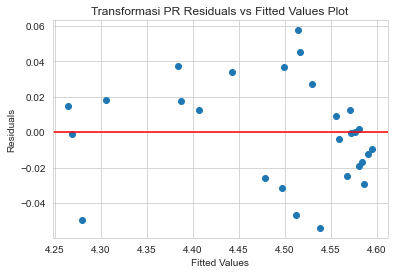

In [61]:
plt.scatter(df_trainPR["trans_PR_pred"], df_trainPR["trans_PR_resid"]) #resid vs fitted plot
plt.axhline(y = df_trainPR["trans_PR_resid"].mean(), color ='red')
plt.title('Transformasi PR Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [62]:
m2_trans = "ln_PR ~ 1 + sqrt_GDP + LE + cbrt_INF + UR"
y, X = dmatrices(m2_trans, df_trainPR, return_type='dataframe')

bp_PR1 = het_breuschpagan(df_trainPR["trans_PR_resid"], X)

print("Breusch-Pagan Statistics:", bp_PR1[0])
print("Breusch-Pagan P-value", bp_PR1[1])

Breusch-Pagan Statistics: 6.2837527374040345
Breusch-Pagan P-value 0.1789359328251371


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

### Multicollinearity Test

In [63]:
def calc_vif(x): #vif function
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

#### GDP 

In [64]:
vif_GDP = df_trainGDP[['UR','ln_INF','POP']]
calc_vif(vif_GDP)

,Variables,VIF
0,UR,12.588955
1,ln_INF,19.836569
2,POP,37.717305


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari UR, ln_INF, dan POP lebih besar dari 5. Oleh karena itu, terdapat multikolinearitas di antara variabel tersebut.

#### Poverty

In [65]:
vif_PR = df_trainPR[['LE','cbrt_INF','UR']]
calc_vif(vif_PR)

,Variables,VIF
0,LE,80.684469
1,cbrt_INF,64.645828
2,UR,8.858740


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari LE, cbrt_INF, dan UR lebih besar dari 5. Oleh karena itu, terdapat multikolinearitas diantara variabel tersebut.

### Autocorrelation Test

#### GDP 

In [66]:
durbin_watson(df_trainGDP["trans_GDP_resid"])

0.6145027859347757

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di GDP model karena hasilnya tidak berada diantara 1.5 - 2.5

#### Poverty

In [67]:
durbin_watson(df_trainPR["trans_PR_resid"])

0.6406458160103652

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di Poverty model karena hasilnya tidak berada diantara 1.5 - 2.5

**Conclusion Uji Asumsi Klasik Transformasi:**
1. Multikolinearitas tidak terpenuhi karena VIF > 5
2. Residual bersifat homoskedastisitas karena varians tersebar secara konstan
3. Data bersifat normal
4. Terdapat autokorelasi karena hasil dari test durbin watson tidak berada pada rentang rule of thumb

# Transformasi Kedua

In [68]:
df_trainGDP1 = df_train.copy()
df_trainPR1 = df_train.copy()

df_trainGDP1['ln_PR'] = np.log(df_train['PR'])
df_trainGDP1['ln_INF'] = np.log(df_train['INF'])
df_trainGDP1['ln_GDP'] = np.log(df_train['GDP'])

df_trainPR1['ln_GDP'] = np.log(df_train['GDP'])
df_trainPR1['ln_INF'] = np.log(df_train['INF']) 
df_trainPR1['ln_PR'] = np.log(df_train['PR'])

## Transformasi GDP Model

In [69]:
trans_formula11 = "ln_GDP ~ ln_INF + UR + [ln_PR ~ LE + ln_GDP] + POP + 1" #reduced form
trans_mod11 = IV2SLS.from_formula(trans_formula11, df_trainGDP1).fit()
print(trans_mod11.first_stage) #first stage summary

    First Stage Estimation Results    
                                 ln_PR
--------------------------------------
R-squared                       0.9744
Partial R-squared               0.7338
Shea's R-squared                0.7338
Partial F-statistic             67.275
P-value (Partial F-stat)     2.442e-15
Partial F-stat Distn           chi2(2)
========================== ===========
Intercept                      -3.7494
                             (-3.2871)
POP                            -0.0260
                             (-8.8684)
UR                              0.0221
                              (5.3555)
ln_INF                          0.0034
                              (0.3099)
LE                              0.2172
                              (7.8738)
ln_GDP                         -0.1071
                             (-5.7777)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [70]:
print(trans_mod11.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 ln_GDP   R-squared:                      0.9531
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9450
No. Observations:                  28   F-statistic:                    1060.1
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:21   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      11.813     5.3316     2.2156     0.0267      1.3629      22.262
POP            0.0220     0.0048     4.5931     0.00

GDP Model setelah dilakukan transformasi kedua. <br>

$ln{(GDP)} = 11.813 + 0.0220 Penduduk - 0.0592 Pengangguran + 0.0118 ln{Inflasi} - 2.393 ln{Kemiskinan}$ <br>

Berdasarkan summary di atas R-squared bernilai 95.31%. Artinya, 95.31% variabel dependen dapat direpresentasikan oleh variabel independen 

## Transformasi Poverty Model

In [71]:
trans_formula22 = "ln_PR ~ ln_INF + UR + [ln_GDP ~ POP + ln_PR] + LE + 1"
trans_mod22 = IV2SLS.from_formula(trans_formula22, df_trainPR1).fit()
print(trans_mod22.first_stage) #first stage summary

    First Stage Estimation Results    
                                ln_GDP
--------------------------------------
R-squared                       0.9786
Partial R-squared               0.5439
Shea's R-squared                0.5439
Partial F-statistic             55.702
P-value (Partial F-stat)     8.024e-13
Partial F-stat Distn           chi2(2)
========================== ===========
Intercept                      -27.880
                             (-3.5568)
LE                              1.2991
                              (6.2957)
UR                              0.0570
                              (2.0973)
ln_INF                         -0.0035
                             (-0.0413)
POP                            -0.1386
                             (-5.5373)
ln_PR                          -5.0200
                             (-7.1001)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [72]:
print(trans_mod22.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  ln_PR   R-squared:                      0.8870
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8673
No. Observations:                  28   F-statistic:                    351.04
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:21   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.8969     0.6298     7.7757     0.0000      3.6626      6.1312
LE             0.0062     0.0138     0.4469     0.65

Poverty Model setelah ditransformasi kedua menjadi sebagai berikut.<br>

$ln{(Kemiskinan)} =  4.8969 + 0.0062 Life Expectancy + 0.0074 Pengangguran + 0.0136 ln{(Inflasi)} - 0.1613 ln{(GDP)}$ <br>

Berdasarkan summary di atas didapatkan R-squared sebesar 88.7%. Hal ini mengindikasikan bahwa 88.7% variabel dependen dapat direpresentasikan oleh variabel independen

## Diagnostic Test

In [73]:
df_trainGDP1["trans_GDP_pred"] = trans_mod11.fitted_values
df_trainGDP1["trans_GDP_resid"] = trans_mod11.resids
df_trainPR1["trans_PR_pred"] = trans_mod22.fitted_values
df_trainPR1["trans_PR_resid"] = trans_mod22.resids

In [74]:
print("GDP Model :  \n Sum of Residuals = ", df_trainGDP1["trans_GDP_resid"].sum())
print("Poverty Model :  \n Sum of Residuals = ", df_trainPR1["trans_PR_resid"].sum())

GDP Model :  
 Sum of Residuals =  1.757233469845687e-09
Poverty Model :  
 Sum of Residuals =  -2.2006219069226063e-10


Berdasarkan hasil sum of residuals di atas dapat dilihat baik GDP Model maupun Poverty Model yang telah ditransformasi memiliki sum of residuals mendekati 0

# Uji Asumsi Klasik

### Normality Test

#### GDP 

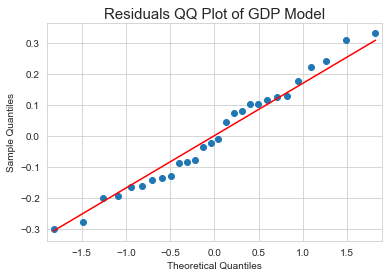

In [75]:
sns.set_style('whitegrid')
sm.qqplot(df_trainGDP1["trans_GDP_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of GDP Model', size=15)
py.show()

In [76]:
jb_GDP = stats.jarque_bera(df_trainGDP1["trans_GDP_resid"])
print("Jarque-Bera Statistics: ", jb_GDP[0])
print("Jarque-Bera P-Value: ", jb_GDP[1])

Jarque-Bera Statistics:  1.0135896250335372
Jarque-Bera P-Value:  0.6024233675369722


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,602, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

#### Poverty

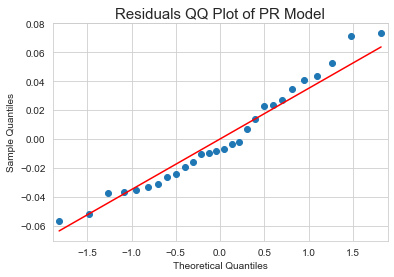

In [77]:
sns.set_style('whitegrid')
sm.qqplot(df_trainPR1["trans_PR_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of PR Model', size=15)
py.show()

In [78]:
jb_PR = stats.jarque_bera(df_trainPR1["trans_PR_resid"])
print("Jarque-Bera Statistics: ", jb_PR[0])
print("Jarque-Bera P-Value: ", jb_PR[1])

Jarque-Bera Statistics:  1.5259997168717714
Jarque-Bera P-Value:  0.4662655961313511


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,466, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

### Heteroskedasticity Test

#### GDP 

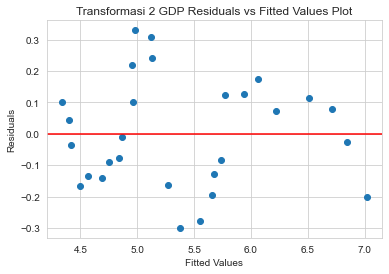

In [79]:
plt.scatter(df_trainGDP1["trans_GDP_pred"], df_trainGDP1["trans_GDP_resid"]) #resid vs fitted plot
plt.axhline(y = df_trainGDP1["trans_GDP_resid"].mean(), color ='red')
plt.title('Transformasi 2 GDP Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [80]:
m1_trans2 = "ln_GDP ~ 1 + UR + ln_PR + ln_INF + POP"
y, X = dmatrices(m1_trans2 , df_trainGDP1, return_type='dataframe')

bp_GDP_trans2 = het_breuschpagan(df_trainGDP1["trans_GDP_resid"], X)

print("Breusch-Pagan Statistics:", bp_GDP_trans2[0])
print("Breusch-Pagan P-value", bp_GDP_trans2[1])

Breusch-Pagan Statistics: 7.495432494309511
Breusch-Pagan P-value 0.11191086924804104


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

#### Poverty

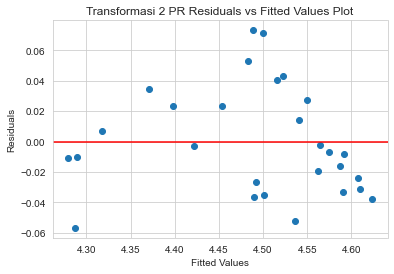

In [81]:
plt.scatter(df_trainPR1["trans_PR_pred"], df_trainPR1["trans_PR_resid"]) #resid vs fitted plot
plt.axhline(y = df_trainPR1["trans_PR_resid"].mean(), color ='red')
plt.title('Transformasi 2 PR Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [82]:
m2_trans2 = "ln_PR ~ 1 + ln_GDP + LE + ln_INF + UR"
y, X = dmatrices(m2_trans2, df_trainPR1, return_type='dataframe')

bp_PR_trans2 = het_breuschpagan(df_trainPR1["trans_PR_resid"], X)

print("Breusch-Pagan Statistics:", bp_PR_trans2[0])
print("Breusch-Pagan P-value", bp_PR_trans2[1])

Breusch-Pagan Statistics: 1.2366722273281967
Breusch-Pagan P-value 0.8720246539718546


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

### Multicollinearity Test

In [83]:
def calc_vif(x): #vif function
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

#### GDP 

In [84]:
vif_GDP = df_trainGDP1[['UR','ln_INF','POP']]
calc_vif(vif_GDP)

,Variables,VIF
0,UR,12.588955
1,ln_INF,19.836569
2,POP,37.717305


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari UR, ln_INF, dan POP lebih besar dari 5. Oleh karena itu, terdapat multikolinearitas di antara variabel tersebut.

#### Poverty

In [85]:
vif_PR = df_trainPR1[['LE','ln_INF','UR']]
calc_vif(vif_PR)

,Variables,VIF
0,LE,42.585256
1,ln_INF,31.402510
2,UR,8.672368


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari LE, ln_INF, dan UR lebih besar dari 5. Oleh karena itu, terdapat multikolinearitas diantara variabel tersebut.

### Autocorrelation Test

#### GDP 

In [86]:
durbin_watson(df_trainGDP1["trans_GDP_resid"])

0.4702313648743827

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di GDP model karena hasilnya tidak berada diantara 1.5 - 2.5

#### Poverty

In [87]:
durbin_watson(df_trainPR1["trans_PR_resid"])

0.5335833748952873

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di Poverty model karena hasilnya tidak berada diantara 1.5 - 2.5

Berdasarkan uji asumsi klasik pada transformasi kedua dapat diambil kesimpulan sebagai berikut. <br>
1. Data berdistribusi normal
2. Terdapat autokorelasi
3. Terdapat multikolinearitas
4. Terdapat homoskedastisitas.

# Transformasi Ketiga

In [88]:
df_trainGDP11 = df_train.copy()
df_trainPR11 = df_train.copy()

df_trainGDP11['sq_PR'] = (df_train['PR'])**2
df_trainGDP11['sqrt_INF'] = (df_train['INF'])**(1/2)
df_trainGDP11['cbrt_GDP'] = (df_train['GDP'])**(1/3)

df_trainPR11['cbrt_GDP'] = (df_train['GDP'])**(1/3)
df_trainPR11['sqrt_INF'] = (df_train['INF'])**(1/2) 
df_trainPR11['sq_PR'] = (df_train['PR'])**2

## Transformasi GDP Model

In [89]:
trans_formula111 = "cbrt_GDP ~ sqrt_INF + UR + [sq_PR ~ LE + cbrt_GDP] + POP + 1" #reduced form
trans_mod111 = IV2SLS.from_formula(trans_formula111, df_trainGDP11).fit()
print(trans_mod111.first_stage) #first stage summary

     First Stage Estimation Results    
                                  sq_PR
---------------------------------------
R-squared                        0.9796
Partial R-squared                0.7842
Shea's R-squared                 0.7842
Partial F-statistic              87.943
P-value (Partial F-stat)         0.0000
Partial F-stat Distn            chi2(2)
========================== ============
Intercept                    -9.285e+04
                              (-6.8671)
POP                             -307.81
                              (-8.2220)
UR                               129.43
                               (2.2914)
sqrt_INF                         29.118
                               (0.2388)
LE                               2595.5
                               (7.9211)
cbrt_GDP                        -681.27
                              (-6.2414)
---------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original mo

In [90]:
print(trans_mod111.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:               cbrt_GDP   R-squared:                      0.9592
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9521
No. Observations:                  28   F-statistic:                    1427.6
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:22   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.2137     2.3800     1.7705     0.0767     -0.4510      8.8784
POP            0.0381     0.0080     4.7602     0.00

GDP Model untuk transformasi yang ketiga:

$GDP^{1/3} = 4.2137 + 0.0381 Penduduk - 0.2031 Pengangguran - 0.0147 \sqrt{Inflasi} - 0.0006 Kemiskinan^{2}$ <br>

Berdasarkan summary di atas didapatkan R-squared sebesar 95.92%. Artinya, 95.92% variabel dependen dapat direpresentasikan oleh variabel independen.

## Transformasi Poverty Model

In [91]:
trans_formula222 = "sq_PR ~ sqrt_INF + UR + [cbrt_GDP ~ POP + sq_PR] + LE + 1"
trans_mod222 = IV2SLS.from_formula(trans_formula222, df_trainPR11).fit()
print(trans_mod222.first_stage) #first stage summary

    First Stage Estimation Results    
                              cbrt_GDP
--------------------------------------
R-squared                       0.9791
Partial R-squared               0.6293
Shea's R-squared                0.6293
Partial F-statistic             142.72
P-value (Partial F-stat)        0.0000
Partial F-stat Distn           chi2(2)
========================== ===========
Intercept                      -92.190
                             (-5.5405)
LE                              2.4791
                              (6.0318)
UR                             -0.0300
                             (-0.6446)
sqrt_INF                       -0.0233
                             (-0.1845)
POP                            -0.2641
                             (-5.4652)
sq_PR                          -0.0009
                             (-11.809)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [92]:
print(trans_mod222.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  sq_PR   R-squared:                      0.9140
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8990
No. Observations:                  28   F-statistic:                    656.40
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:22   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -2124.4     7341.0    -0.2894     0.7723  -1.651e+04   1.226e+04
LE             288.88     137.57     2.0998     0.03

Poverty model untuk transformasi ketiga:<br>

$Kemiskinan^{2} = -2124.4 + 288.88 Life Expectancy - 179.82 Pengangguran + 38.945 \sqrt{INF} - 1247.6 GDP^{1/3}$<br>

Berdasarkan summary di atas didapatkan R-squared sebesar 91.4% yang berarti 91.4% variabel dependen dapat direpresentasikan oleh variabel independen.

## Diagnostic Test

In [93]:
df_trainGDP11["trans_GDP_pred"] = trans_mod111.fitted_values
df_trainGDP11["trans_GDP_resid"] = trans_mod111.resids
df_trainPR11["trans_PR_pred"] = trans_mod222.fitted_values
df_trainPR11["trans_PR_resid"] = trans_mod222.resids

In [94]:
print("GDP Model :  \n Sum of Residuals = ", df_trainGDP11["trans_GDP_resid"].sum())
print("Poverty Model :  \n Sum of Residuals = ", df_trainPR11["trans_PR_resid"].sum())

GDP Model :  
 Sum of Residuals =  4.89341900333784e-11
Poverty Model :  
 Sum of Residuals =  -1.074322426575236e-06


Berdasarkan hasil sum of residuals di atas dapat dilihat baik GDP Model maupun Poverty Model yang telah ditransformasi memiliki sum of residuals mendekati 0

# Uji Asumsi Klasik

### Normality Test

#### GDP 

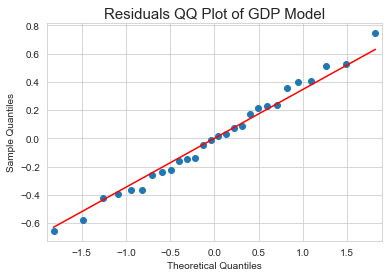

In [95]:
sns.set_style('whitegrid')
sm.qqplot(df_trainGDP11["trans_GDP_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of GDP Model', size=15)
py.show()

In [96]:
jb_GDP = stats.jarque_bera(df_trainGDP11["trans_GDP_resid"])
print("Jarque-Bera Statistics: ", jb_GDP[0])
print("Jarque-Bera P-Value: ", jb_GDP[1])

Jarque-Bera Statistics:  0.6360680065165136
Jarque-Bera P-Value:  0.7275780479697029


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,728, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

#### Poverty

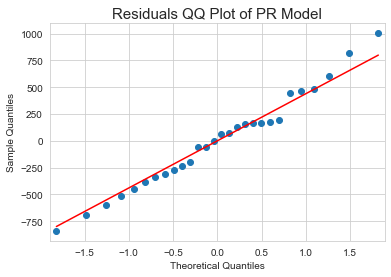

In [97]:
sns.set_style('whitegrid')
sm.qqplot(df_trainPR11["trans_PR_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of PR Model', size=15)
py.show()

In [98]:
jb_PR = stats.jarque_bera(df_trainPR11["trans_PR_resid"])
print("Jarque-Bera Statistics: ", jb_PR[0])
print("Jarque-Bera P-Value: ", jb_PR[1])

Jarque-Bera Statistics:  0.4119956659076643
Jarque-Bera P-Value:  0.8138348398986809


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,814, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

### Heteroskedasticity Test

#### GDP 

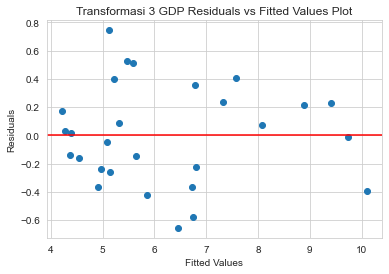

In [99]:
plt.scatter(df_trainGDP11["trans_GDP_pred"], df_trainGDP11["trans_GDP_resid"]) #resid vs fitted plot
plt.axhline(y = df_trainGDP11["trans_GDP_resid"].mean(), color ='red')
plt.title('Transformasi 3 GDP Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [100]:
m1_trans3 = "cbrt_GDP ~ 1 + UR + sq_PR + sqrt_INF + POP"
y, X = dmatrices(m1_trans3, df_trainGDP11, return_type='dataframe')

bp_GDP_trans3 = het_breuschpagan(df_trainGDP11["trans_GDP_resid"], X)

print("Breusch-Pagan Statistics:", bp_GDP_trans3[0])
print("Breusch-Pagan P-value", bp_GDP_trans3[1])

Breusch-Pagan Statistics: 6.701345942896855
Breusch-Pagan P-value 0.15253786293148555


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

#### Poverty

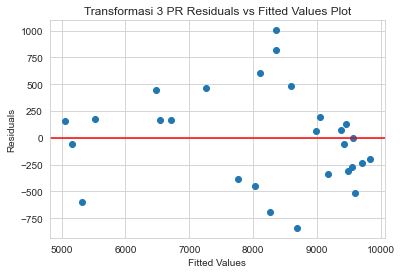

In [101]:
plt.scatter(df_trainPR11["trans_PR_pred"], df_trainPR11["trans_PR_resid"]) #resid vs fitted plot
plt.axhline(y = df_trainPR11["trans_PR_resid"].mean(), color ='red')
plt.title('Transformasi 3 PR Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [102]:
m2_trans3 = "sq_PR ~ 1 + cbrt_GDP + LE + sqrt_INF + UR"
y, X = dmatrices(m2_trans3, df_trainPR11, return_type='dataframe')

bp_PR_trans3 = het_breuschpagan(df_trainPR11["trans_PR_resid"], X)

print("Breusch-Pagan Statistics:", bp_PR_trans3[0])
print("Breusch-Pagan P-value", bp_PR_trans3[1])

Breusch-Pagan Statistics: 3.6033613816175323
Breusch-Pagan P-value 0.46233700443603054


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

### Multicollinearity Test

In [103]:
def calc_vif(x): #vif function
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

#### GDP 

In [104]:
vif_GDP = df_trainGDP11[['UR','sqrt_INF','POP']]
calc_vif(vif_GDP)

,Variables,VIF
0,UR,12.522072
1,sqrt_INF,20.650547
2,POP,38.234197


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari UR, sqrt_INF, dan POP lebih besar dari 5. Oleh karena itu, terdapat multikolinearitas di antara variabel tersebut.

#### Poverty

In [105]:
vif_PR = df_trainPR11[['LE','sqrt_INF','UR']]
calc_vif(vif_PR)

,Variables,VIF
0,LE,43.371570
1,sqrt_INF,32.844596
2,UR,8.631259


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari LE, sqrt_INF, dan UR lebih besar dari 5. Oleh karena itu, terdapat multikolinearitas diantara variabel tersebut.

### Autocorrelation Test

#### GDP 

In [106]:
durbin_watson(df_trainGDP11["trans_GDP_resid"])

0.5426214499714022

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di GDP model karena hasilnya tidak berada diantara 1.5 - 2.5

#### Poverty

In [107]:
durbin_watson(df_trainPR11["trans_PR_resid"])

0.6100507605413613

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di Poverty model karena hasilnya tidak berada diantara 1.5 - 2.5

# MSE

## Before Transformation

In [108]:
rmsegdp_before=mean_squared_error(df_train.GDP, mod1.fitted_values, squared=False)
print('RMSE GDP Before Transformation:', rmsegdp_before)

rmsepr_before=mean_squared_error(df_train.PR, mod2.fitted_values, squared=False)
print('RMSE PR Before Transformation:', rmsepr_before)

RMSE GDP Before Transformation: 48.823368713226806
RMSE PR Before Transformation: 2.03769676047904


## After Transformation

### Transformasi 1

In [109]:
rmsegdp_after1=mean_squared_error(df_trainGDP.sqrt_GDP, trans_mod1.fitted_values, squared=False)
print('RMSE GDP After Transformation 1:', rmsegdp_after1)

rmsepr_after1 =mean_squared_error(df_trainPR.ln_PR, trans_mod2.fitted_values, squared=False)
print('RMSE PR After Transformation 1:', rmsepr_after1)

RMSE GDP After Transformation 1: 1.3315732853770996
RMSE PR After Transformation 1: 0.028600233000837725


### Transformasi 2

In [110]:
rmsegdp_after2=mean_squared_error(df_trainGDP1.ln_GDP, trans_mod11.fitted_values, squared=False)
print('RMSE GDP After Transformation 2:', rmsegdp_after2)

rmsepr_after2 =mean_squared_error(df_trainPR1.ln_PR, trans_mod22.fitted_values, squared=False)
print('RMSE PR After Transformation 2:', rmsepr_after2)

RMSE GDP After Transformation 2: 0.16898319808271542
RMSE PR After Transformation 2: 0.035021580519757775


### Transformasi 3

In [111]:
rmsegdp_after3=mean_squared_error(df_trainGDP11.cbrt_GDP, trans_mod111.fitted_values, squared=False)
print('RMSE GDP After Transformation 3:', rmsegdp_after3)

rmsepr_after3 =mean_squared_error(df_trainPR11.sq_PR, trans_mod222.fitted_values, squared=False)
print('RMSE PR After Transformation 3:', rmsepr_after3)

RMSE GDP After Transformation 3: 0.34622814110963585
RMSE PR After Transformation 3: 439.2644917348632


# Perbandingan MSE dan R-squared Before and After Transformation

## Rsquared

In [112]:
compare_rsquared = pd.DataFrame({'Keterangan':['GDP Model','Poverty Model'],'Before Transformation':[mod1.rsquared, mod2.rsquared],'Transformation 1':[trans_mod1.rsquared,trans_mod2.rsquared],'Transformation 2':[trans_mod11.rsquared,trans_mod22.rsquared],'Transformation 3':[trans_mod111.rsquared,trans_mod222.rsquared]}).set_index('Keterangan')
compare_rsquared

,Before Transformation,Transformation 1,Transformation 2,Transformation 3
Keterangan,,,,
GDP Model,0.965445,0.960978,0.953114,0.959181
Poverty Model,0.946247,0.924630,0.886986,0.913975


## MSE

In [113]:
compare_mse = pd.DataFrame({'Keterangan':['GDP Model','Poverty Model'],'Before Transformation':[rmsegdp_before,rmsepr_before],'Transformation 1':[rmsegdp_after1,rmsepr_after1],'Transformation 2':[rmsegdp_after2,rmsepr_after2],'Transformation 3':[rmsegdp_after3,rmsepr_after3]}).set_index('Keterangan')
compare_mse

,Before Transformation,Transformation 1,Transformation 2,Transformation 3
Keterangan,,,,
GDP Model,48.823369,1.331573,0.168983,0.346228
Poverty Model,2.037697,0.028600,0.035022,439.264492


# Revisi Transformasi

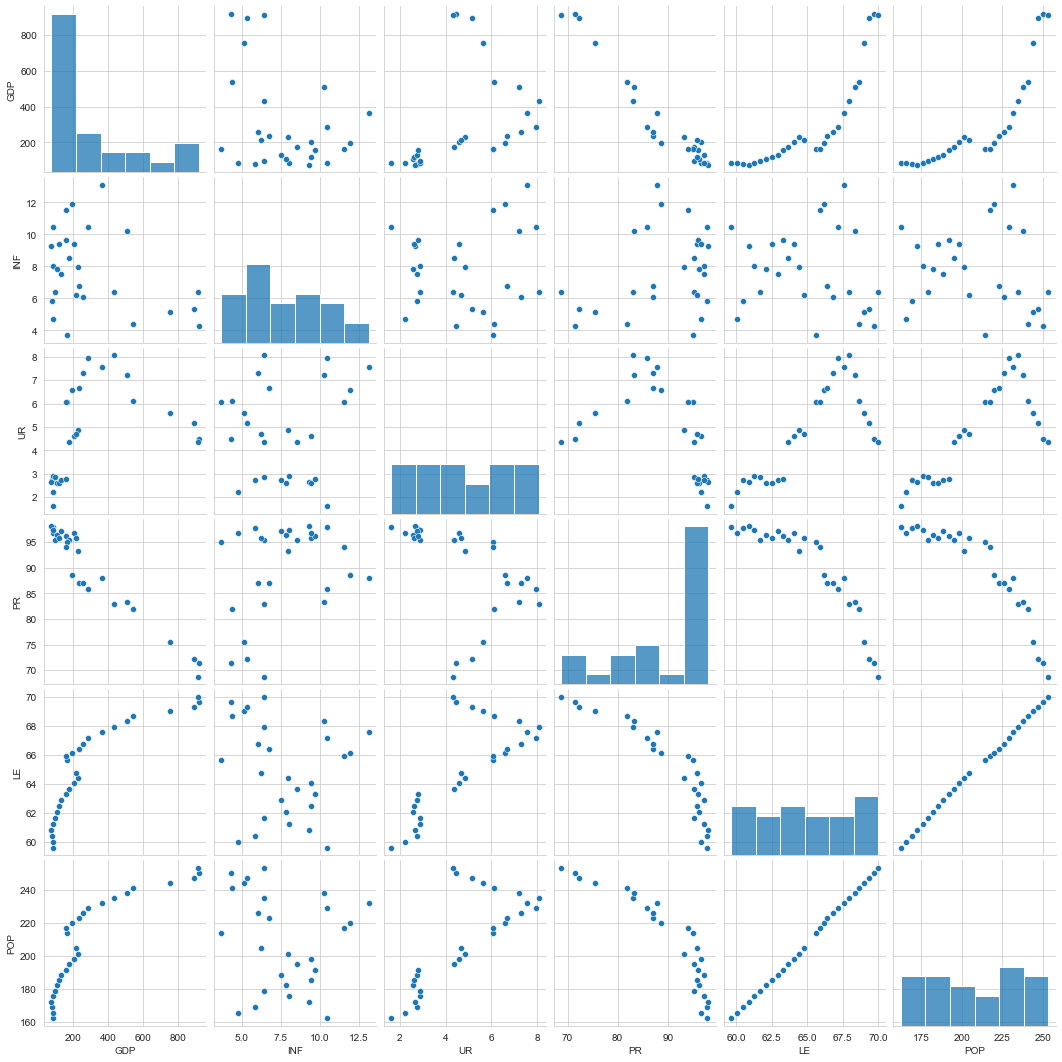

In [114]:
sns.pairplot(data=df_train[["GDP","INF","UR","PR","LE",'POP']])
plt.show()

## Transformasi 4

In [115]:
df_trainGDP111 = df_train.copy()
df_trainPR111 = df_train.copy()

df_trainGDP111['ln_PR'] = np.log(df_train['PR'])
df_trainGDP111['exp_INF'] = np.exp(df_train['INF'])
df_trainGDP111['ln_GDP'] = np.log(df_train['GDP'])
df_trainGDP111['reci_POP'] = (df_train['POP'])**(-1)
df_trainGDP111['sq_UR'] = (df_train['UR'])**2

df_trainPR111['sqrt_GDP'] = (df_train['GDP'])**(1/2)
df_trainPR111['exp_INF'] = np.exp(df_train['INF']) 
df_trainPR111['ln_PR'] = np.log(df_train['PR'])
df_trainPR111['sq_UR'] = (df_train['UR'])**2
df_trainPR111['sq_LE'] = df_train['LE']**2

**Reason Penggunaan Model Transformasi pada GDP Model:**
1. Variabel kemiskinan (PR) ditransformasi menggunakan logaritma karena tergolong left skewed
2. Variabel Inflasi (INF) ditransformasi menggunakan exponential karena di pairplot di atas hubungan antara GDP dan Inflasi mendekati bentuk fungsi exponential
3. Variabel GDP di transformasi menggunakan logarithmic karena tergolong right skewed
4. Variabel penduduk (POP) di transformasi menggunakan reciprocal karena apabila dilihat hubungan antara GDP dan POP pada pairplot di atas seperti bentuk reciprocal function.
5. Variabel unemployment rate (UR) di transformasi menggunakan square karena apabila dilihat dari pairplot di atas, hubungan antara GDP dan UR mendekati bentuk kuadrat

**Reason Penggunaan Model Transformasi pada Poverty Model**:

1. Variabel GDP ditransformasi menggunakan sqrt karena tergolong right skewed
2. Variabel Inflasi (INF) ditransformasi menggunakan exponential karena di pairplot di atas dapat dilihat bahwa hubungan variabel Kemiskinan dan variabel Inflasi membentuk hubungan yang menyerupai fungsi eksponensial
3. Variabel Kemiskinan (PR) ditransformasi menggunakan logaritma karena termasuk left skewed.
4. Variabel Pengangguran (UR) ditransformasi menggunakan square karena apabila dilihat melalui pairplot di atas hubungan antara variabel kemiskinan dan variabel pengangguran membentuk hubungan yang menyerupai fungsi kuadrat
5. Variabel Angka harapan hidup (LE) di transformasi menggunakan kuadrat karena apabila dilihat dari pairplot di atas hubungan antara variabel kemiskinan dan variabel angka harapan hidup berbentuk seperti fungsi kuadrat

## Transformasi GDP Model

In [116]:
trans_formula1111 = "ln_GDP ~ exp_INF + sq_UR + [ln_PR ~ LE + ln_GDP] + reci_POP + 1" #reduced form
trans_mod1111 = IV2SLS.from_formula(trans_formula1111, df_trainGDP111).fit()
print(trans_mod1111.first_stage) #first stage summary

    First Stage Estimation Results    
                                 ln_PR
--------------------------------------
R-squared                       0.9441
Partial R-squared               0.7395
Shea's R-squared                0.7395
Partial F-statistic             81.711
P-value (Partial F-stat)        0.0000
Partial F-stat Distn           chi2(2)
========================== ===========
Intercept                       18.382
                              (7.9483)
exp_INF                       6.39e-08
                              (1.9327)
reci_POP                       -622.61
                             (-5.7629)
sq_UR                           0.0006
                              (1.5975)
LE                             -0.1688
                             (-5.6188)
ln_GDP                          0.0196
                              (0.5306)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [117]:
print(trans_mod1111.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 ln_GDP   R-squared:                      0.9466
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9373
No. Observations:                  28   F-statistic:                    780.81
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:26   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      28.628     3.0379     9.4234     0.0000      22.673      34.582
exp_INF     1.967e-07  2.889e-07     0.6809     0.49

GDP Model untuk transformasi yang keempat:

$\ln{GDP} = 28.628 + 1.967e-07 exp(Inflasi) - 527.35Penduduk^{-1} - 0.0020 Pengangguran^{2} - 4.5909 ln{Kemiskinan}$ <br>

Berdasarkan summary di atas didapatkan R-squared sebesar 94.66%. Artinya, 94.66% variabel dependen dapat direpresentasikan oleh variabel independen.

## Transformasi Poverty Model

In [118]:
trans_formula2222 = "ln_PR ~ exp_INF + sq_UR + [sqrt_GDP ~ POP + ln_PR] + sq_LE + 1"
trans_mod2222 = IV2SLS.from_formula(trans_formula2222, df_trainPR111).fit()
print(trans_mod2222.first_stage) #first stage summary

    First Stage Estimation Results    
                              sqrt_GDP
--------------------------------------
R-squared                       0.9883
Partial R-squared               0.8324
Shea's R-squared                0.8324
Partial F-statistic             184.62
P-value (Partial F-stat)        0.0000
Partial F-stat Distn           chi2(2)
========================== ===========
Intercept                       97.613
                              (4.4127)
exp_INF                      2.553e-06
                              (2.9198)
sq_LE                           0.0958
                              (9.3678)
sq_UR                           0.0183
                              (1.0916)
POP                            -1.3385
                             (-8.5837)
ln_PR                          -46.519
                             (-12.106)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [119]:
print(trans_mod2222.summary) #second stage summary

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  ln_PR   R-squared:                      0.9366
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9256
No. Observations:                  28   F-statistic:                    514.96
Date:                Sat, Sep 03 2022   P-value (F-stat)                0.0000
Time:                        08:01:27   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.4699     0.1603     27.876     0.0000      4.1557      4.7842
exp_INF     4.442e-08  4.281e-08     1.0376     0.29

Poverty model untuk transformasi ketiga:<br>

$\ln{Kemiskinan} = 4.4699 + 4.442e-08 exp(Inflasi) + 7.996e-05 Life Expectancy^{2} - 0.0006 Pengangguran^{2} - 0.0189 \sqrt{GDP}$<br>

Berdasarkan summary di atas didapatkan R-squared sebesar 93.66% yang berarti 93.66% variabel dependen dapat direpresentasikan oleh variabel independen.

## Diagnostic Test

In [120]:
df_trainGDP111["trans_GDP_pred"] = trans_mod1111.fitted_values
df_trainGDP111["trans_GDP_resid"] = trans_mod1111.resids
df_trainPR111["trans_PR_pred"] = trans_mod2222.fitted_values
df_trainPR111["trans_PR_resid"] = trans_mod2222.resids

In [121]:
print("GDP Model :  \n Sum of Residuals = ", df_trainGDP111["trans_GDP_resid"].sum())
print("Poverty Model :  \n Sum of Residuals = ", df_trainPR111["trans_PR_resid"].sum())

GDP Model :  
 Sum of Residuals =  -2.2935431331916334e-11
Poverty Model :  
 Sum of Residuals =  6.282441233906866e-11


Berdasarkan hasil sum of residuals di atas dapat dilihat baik GDP Model maupun Poverty Model yang telah ditransformasi memiliki sum of residuals mendekati 0

# Uji Asumsi Klasik

### Normality Test

#### GDP 

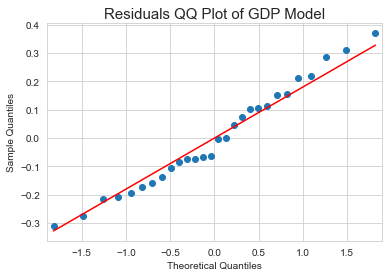

In [122]:
sns.set_style('whitegrid')
sm.qqplot(df_trainGDP111["trans_GDP_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of GDP Model', size=15)
py.show()

In [123]:
jb_GDP = stats.jarque_bera(df_trainGDP111["trans_GDP_resid"])
print("Jarque-Bera Statistics: ", jb_GDP[0])
print("Jarque-Bera P-Value: ", jb_GDP[1])

Jarque-Bera Statistics:  1.1775279737228626
Jarque-Bera P-Value:  0.555012864146805


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,555, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

#### Poverty

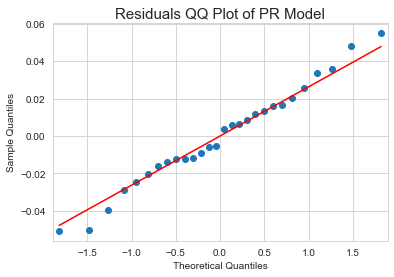

In [124]:
sns.set_style('whitegrid')
sm.qqplot(df_trainPR111["trans_PR_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of PR Model', size=15)
py.show()

In [125]:
jb_PR = stats.jarque_bera(df_trainPR111["trans_PR_resid"])
print("Jarque-Bera Statistics: ", jb_PR[0])
print("Jarque-Bera P-Value: ", jb_PR[1])

Jarque-Bera Statistics:  0.18028410018945049
Jarque-Bera P-Value:  0.913801370480108


$H_0$ : data berdistribusi normal <br>
$H_1$ : data tidak berdistribusi normal <br>

Jarque-Bera p-value yang didapatkan sebesar 0,914, sehingga H0 tidak ditolak karena p-value > 0,05 dan dapat disimpulkan bahwa data berdistribusi normal

### Heteroskedasticity Test

#### GDP 

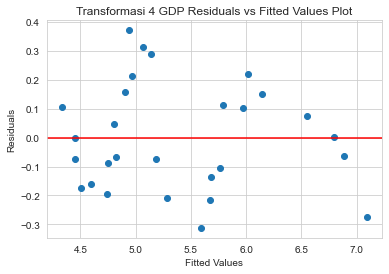

In [126]:
plt.scatter(df_trainGDP111["trans_GDP_pred"], df_trainGDP111["trans_GDP_resid"]) #resid vs fitted plot
plt.axhline(y = df_trainGDP111["trans_GDP_resid"].mean(), color ='red')
plt.title('Transformasi 4 GDP Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [127]:
m1_trans4 = "ln_GDP ~ 1 + sq_UR + ln_PR + exp_INF + reci_POP"
y, X = dmatrices(m1_trans4, df_trainGDP111, return_type='dataframe')

bp_GDP_trans4 = het_breuschpagan(df_trainGDP111["trans_GDP_resid"], X)

print("Breusch-Pagan Statistics:", bp_GDP_trans4[0])
print("Breusch-Pagan P-value", bp_GDP_trans4[1])

Breusch-Pagan Statistics: 4.792513525178839
Breusch-Pagan P-value 0.30925692049546183


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

#### Poverty

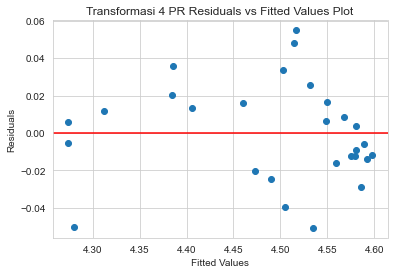

In [128]:
plt.scatter(df_trainPR111["trans_PR_pred"], df_trainPR111["trans_PR_resid"]) #resid vs fitted plot
plt.axhline(y = df_trainPR111["trans_PR_resid"].mean(), color ='red')
plt.title('Transformasi 4 PR Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [129]:
m2_trans4 = "ln_PR ~ 1 + sqrt_GDP + sq_LE + exp_INF + sq_UR"
y, X = dmatrices(m2_trans4, df_trainPR111, return_type='dataframe')

bp_PR_trans4 = het_breuschpagan(df_trainPR111["trans_PR_resid"], X)

print("Breusch-Pagan Statistics:", bp_PR_trans4[0])
print("Breusch-Pagan P-value", bp_PR_trans4[1])

Breusch-Pagan Statistics: 2.766899431770543
Breusch-Pagan P-value 0.597559859339349


$H_0$ : variance data konstan <br>
$H_1$ : variance data tidak konstan <br>

Karena Breusch-Pagan p-value > 0.05 kita tidak reject H0 sehingga variance data konstan atau dapat dikatakan homoskedastisitas

### Multicollinearity Test

In [130]:
def calc_vif(x): #vif function
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

#### GDP 

In [131]:
vif_GDP = df_trainGDP111[['sq_UR','exp_INF','reci_POP']]
calc_vif(vif_GDP)

,Variables,VIF
0,sq_UR,2.633112
1,exp_INF,1.293352
2,reci_POP,2.251856


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari sq_UR, exp_INF, dan reci_POP lebih kecil dari 5. Oleh karena itu, tidak terdapat multikolinearitas di antara variabel tersebut.

#### Poverty

In [132]:
vif_PR = df_trainPR111[['sq_LE','exp_INF','sq_UR']]
calc_vif(vif_PR)

,Variables,VIF
0,sq_LE,3.562505
1,exp_INF,1.304520
2,sq_UR,4.050977


Berdasarkan tabel di atas, didapati bahwa nilai VIF dari sq_LE, exp_INF, dan sq_UR lebih kecil dari 5. Oleh karena itu, tidak terdapat multikolinearitas diantara variabel tersebut.

### Autocorrelation Test

#### GDP 

In [133]:
durbin_watson(df_trainGDP111["trans_GDP_resid"])

0.4616728404426334

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di GDP model karena hasilnya tidak berada diantara 1.5 - 2.5

#### Poverty

In [134]:
durbin_watson(df_trainPR111["trans_PR_resid"])

0.5645532944958415

Berdasarkan rule of thumb Durbin Watson, hasil DW Test Statistics tersebut menunjukkan bahwa terdapat autokorelasi di Poverty model karena hasilnya tidak berada diantara 1.5 - 2.5

Berdasarkan hasil dari uji asumsi klasik pada transformasi 4 berikut point-point penting yang dapat diambil
1. Normality test untuk GDP dan Poverty model terpenuhi
2. Terdapat homoskedastisitas (varians tersebar secara konstan) untuk GDP dan Poverty model
3. Tidak terdapat multicollinearity untuk GDP dan Poverty model
4. Terdapat autokorelasi pada GDP dan Poverty model karena data yang digunakan merupakan data time series

# MSE 

## Transformasi 4

In [135]:
rmsegdp_after4=mean_squared_error(df_trainGDP111.ln_GDP, trans_mod1111.fitted_values, squared=False)
print('RMSE GDP After Transformation 4:', rmsegdp_after4)

rmsepr_after4 =mean_squared_error(df_trainPR111.ln_PR, trans_mod2222.fitted_values, squared=False)
print('RMSE PR After Transformation 4:', rmsepr_after4)

RMSE GDP After Transformation 4: 0.18035089424896428
RMSE PR After Transformation 4: 0.026234565479528474


# Perbandingan MSE dan R-squared Before and After Transformation

## Rsquared

In [136]:
compare_rsquared = pd.DataFrame({'Keterangan':['GDP Model','Poverty Model'],'Before Transformation':[mod1.rsquared, mod2.rsquared],'Transformation 1':[trans_mod1.rsquared,trans_mod2.rsquared],'Transformation 2':[trans_mod11.rsquared,trans_mod22.rsquared],'Transformation 3':[trans_mod111.rsquared,trans_mod222.rsquared],'Transformation 4':[trans_mod1111.rsquared,trans_mod2222.rsquared]}).set_index('Keterangan')
compare_rsquared

,Before Transformation,Transformation 1,Transformation 2,Transformation 3,Transformation 4
Keterangan,,,,,
GDP Model,0.965445,0.960978,0.953114,0.959181,0.946594
Poverty Model,0.946247,0.924630,0.886986,0.913975,0.936583


## MSE

In [137]:
compare_mse = pd.DataFrame({'Keterangan':['GDP Model','Poverty Model'],'Before Transformation':[rmsegdp_before,rmsepr_before],'Transformation 1':[rmsegdp_after1,rmsepr_after1],'Transformation 2':[rmsegdp_after2,rmsepr_after2],'Transformation 3':[rmsegdp_after3,rmsepr_after3],'Transformation 4':[rmsegdp_after4,rmsepr_after4]}).set_index('Keterangan')
compare_mse

,Before Transformation,Transformation 1,Transformation 2,Transformation 3,Transformation 4
Keterangan,,,,,
GDP Model,48.823369,1.331573,0.168983,0.346228,0.180351
Poverty Model,2.037697,0.028600,0.035022,439.264492,0.026235


# Conclusion

1. Terdapat hubungan simultan antara GDP dan Kemiskinan atau dengan kata lain terdapat endogenitas pada GDP dan Kemiskinan.
2. Estimasi parameter dari original model:<br>
$GDP = 1987.3 - 0.8649 Inflasi  + 3.3385 Penduduk - 41.408 Pengangguran - 24.282 Kemiskinan$ <br>
$Kemiskinan = 7.4233  - 0.0522 Inflasi  + 1.6268 Life Expectancy - 2.0212 Pengangguran - 0.0446 GDP$ <br>
3. Karena original model hanya memenuhi normality test dan homoskedasticity pada uji asumsi klasik, maka dilakukan transformasi. Berikut merupakan hasil transformasi.<br>
    **Transformasi 1**<br>
    $\sqrt{GDP} = 15.614  + 0.1319 Penduduk - 0.8994 Pengangguran - 0.1275 ln(Inflasi) - 0.0028 Kemiskinan^{2}$ <br>
    $\ln{(PR)} = 3.6322  + 0.0194 Life Expectancy - 0.0110 Pengangguran + 0.0005 Inflasi^{1/3} - 0.0221 \sqrt{GDP}$ <br>
    Karena transformasi pertama hanya memenuhi normality test dan homoskedasticity  juga maka dilakukan transformasi lagi dengan model yang berbeda <br><br>
    **Transformasi 2** <br>
    $ln{(GDP)} = 11.813 + 0.0220 Penduduk - 0.0592 Pengangguran + 0.0118 ln{Inflasi} - 2.393 ln{Kemiskinan}$ <br>
    $ln{(Kemiskinan)} =  4.8969 + 0.0062 Life Expectancy + 0.0074 Pengangguran + 0.0136 ln{(Inflasi)} - 0.1613 ln{(GDP)}$ <br>
    Karena transformasi kedua hanya memenuhi normality test dan homoskedasticity juga maka dilakukan transformasi lagi dengan model yang berbeda <br><br>
    **Transformasi 3** <br>
    $GDP^{1/3} = 4.2137 + 0.0381 Penduduk - 0.2031 Pengangguran - 0.0147 \sqrt{Inflasi} - 0.0006 Kemiskinan^{2}$ <br>
    $Kemiskinan^{2} = -2124.4 + 288.88 Life Expectancy - 179.82 Pengangguran + 38.945 \sqrt{INF} - 1247.6 GDP^{1/3}$<br>
    Transformasi ketiga juga hanya memenuhi normality test dan homoskedasticity. Karena transformasi ketiga tidak memenuhi uji asumsi klasik secara keseluruhan maka dilakukan transformasi dengan model berbeda.<br><br>
    **Transformasi 4**<br>
    $\ln{GDP} = 28.628 + 1.967e-07 exp(Inflasi) - 527.35Penduduk^{-1} - 0.0020 Pengangguran^{2} - 4.5909 ln{Kemiskinan}$ <br>
    $\ln{Kemiskinan} = 4.4699 + 4.442e-08 exp(Inflasi) + 7.996e-05 Life Expectancy^{2} - 0.0006 Pengangguran^{2} - 0.0189 \sqrt{GDP}$<br>
    Transformasi keempat telah memenuhi uji asumsi klasik normality test, homoscedasticity, dan multicolinearity. Untuk autocorrelation tidak terpenuhi mengingat data yang digunakan merupakan data time series.
4. Apabila dilihat baik original model maupun model yang telah ditransformasi memiliki akurasi yang tinggi (R-squared seluruhnya di atas 75%). Oleh karena itu, dapat dikatakan bahwa baik original model maupun transformed model dapat diaplikasikan untuk pemodelan persamaan simultan poverty dan GDP di Indonesia, serta faktor-faktor yang memengaruhi GDP dan Poverty. 
5. Original model memiliki akurasi yang lebih tinggi daripada model transformasi. Akan tetapi, MSE atau error dari original model cenderung lebih tinggi daripada MSE atau error model transformasi
6. Model terbaik yang dapat digunakan adalah model **transformasi 4** karena telah memenuhi uji asumsi klasik homoskedastisitas, normality test, dan multikolinearitas. Selain memenuhi uji asumsi klasik, model ini juga memiliki r-squared yang cukup tinggi untuk GDP model sebesar 94.66% dan untuk Poverty model sebesar 93.65%. Ditambah lagi, nilai MSE dari GDP model dan Poverty model pada Transformasi 4 juga cukup kecil.